# Final Proyect: Bank Marketing Segmentation

Group Members: 
- Paola Barrea
- Nicolás Bierti del Rey

The increasing number of marketing campaigns over time has reduced their effect on the general public.
In addition, economic pressures and competition have led companies to invest in targeted campaigns with strict selection of contacts. This type of campaign can be improved by using Business Intelligence (BI) and Data Mining (DM) techniques.<br><br>
The data was collected from a Portuguese marketing campaign related to the subscription of bank deposits. 
The business objective is **to find a model that can explain the success of a contact, that is, if the customer signs the deposit**.<br><br>
Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.



<br><br>
The dataset was obtained Kaggle: https://www.kaggle.com/dhirajnirne/bank-marketing

Our problem Confussion Matrix can be explain in the following way: 

- there will be clients with whom we will contact because the model has predicted that they would accept and in reality they do not buy the product (False Positive [FP], False Positives).
- there will also be clients with whom we will not contact because the model has predicted that they would not accept but in reality they would buy it (False Negative [FN], False Negatives).
- there will be clients with whom we will contact because the model has predicted that they would accept and in fact they do buy the product (True Positive [TP], True Positives).
- there will be clients that we will not contact because the model has predicted that they would not accept the offer and in reality they do not accept it (True Negative [TN], True Negatives).

# Data Acquisition

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as skm
from sklearn.metrics import plot_roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

#### Dicctionary: bank_marketing_data.csv

<span style='color:orange'>**Personal information**<br></span>
**age**<br>
**age group:** variable age divided in 9 groups according to the age, 1-9 = 1, 20-29 = 2 and so on<br>
**eligible:** variable base in personal information<br>
**job:** type of job <br>
**salary**<br>
**marital**<br>
**education:** level of education completed <br>
**marital-education:** combination of previous columns<br>
**targeted:** variable base in personal information. Rename: **tag**<br>
<span style='color:orange'>**Financial information**<br></span>
**default:** has unpayed credit? <br>
**balance:** remaining balance in the account <br>
**housing:** has housing loan? <br>
**loan:** has previous loan?<br>
<span style='color:orange'>**Last contact information**<br></span>
**contact:** communication type <br>
**day:** day of the month <br>
**month** <br>
**duration:** in seconds, if equal to 0 target will be 'False'. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
**campaign:** number of contacts preformed in this campaign for this client <br>
<span style='color:orange'>**Previous campaing info**<br></span>
**pdays:** number of days pass since last contact in previous campaing, 999 equals 'no contact'. <br>
**previous:**  number of times this client was contacted before this campaign. Rename: **pcampign** <br>
**poutcome:** outcome of the previous marketing campaign<br>
<span style='color:orange'>**Target**<br></span>
**y:** has the client subscribed?, equal to 'response'<br>
**response** rename **outcome**

In [3]:
data = pd.read_csv("bank_marketing_data.csv")
data.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [4]:
df = data # to retain the original dataset in the data variable

In [5]:
df.rename(columns={'age group':'age_group','targeted':'tag','previous':'pcampaign','response':'outcome'},inplace=True)
df.head()

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age_group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   tag                45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [7]:
df.isnull().sum()

age                  0
age_group            0
eligible             0
job                  0
salary               0
marital              0
education            0
marital-education    0
tag                  0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
pcampaign            0
poutcome             0
y                    0
outcome              0
dtype: int64

No missing values found

In [8]:
df.describe()

,age,age_group,salary,balance,day,duration,campaign,pdays,pcampaign,outcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.645861,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,1.083271,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,1.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,9.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
df.columns

Index(['age', 'age_group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'tag', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'pcampaign',
       'poutcome', 'y', 'outcome'],
      dtype='object')

After visualizing


In [10]:
df.groupby(['age_group','eligible']).agg({'eligible':'count'})

,,eligible
age_group,eligible,
1,N,47
2,Y,5226
3,Y,18089
4,Y,11655
5,Y,8410
6,N,1230
7,N,424
8,N,121
9,N,9


Only a certain group of people are eligible to be called. This corresponds to people ranging from 20 to 59 years old.

In [11]:
df.loc[df['salary']==0]

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
216,47,4,Y,unknown,0,married,unknown,married-unknown,no,no,...,unknown,5,may,338,2,-1,0,unknown,no,0
354,59,5,Y,unknown,0,divorced,unknown,divorced-unknown,no,no,...,unknown,5,may,347,3,-1,0,unknown,no,0
876,37,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,7,may,131,1,-1,0,unknown,no,0
1072,29,2,Y,unknown,0,single,primary,single-primary,yes,no,...,unknown,7,may,50,2,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,4,Y,unknown,0,married,tertiary,married-tertiary,yes,no,...,cellular,7,sep,314,1,-1,0,unknown,yes,1
44742,64,6,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,9,sep,378,4,-1,0,unknown,no,0
44970,28,2,Y,unknown,0,single,unknown,single-unknown,no,no,...,cellular,11,oct,450,1,231,1,success,yes,1
45141,77,7,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,8,nov,207,1,185,3,success,no,0


There are people whose salary is 0 and they correspond to unknown job

In [12]:
df.groupby(['poutcome','y']).agg({'y':'count'})

y
poutcome y         
failure  no    4283
         yes    618
other    no    1533
         yes    307
success  no     533
         yes    978
unknown  no   33573
         yes   3386

In [13]:
df.loc[df['tag']=='no']

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
6,28,2,Y,management,100000,single,tertiary,single-tertiary,no,no,...,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,4,Y,entrepreneur,120000,divorced,tertiary,divorced-tertiary,no,yes,...,unknown,5,may,380,1,-1,0,unknown,no,0
13,58,5,Y,technician,60000,married,unknown,married-unknown,no,no,...,unknown,5,may,71,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45186,59,5,Y,unknown,0,married,unknown,married-unknown,no,no,...,cellular,16,nov,280,1,104,2,failure,no,0
45191,75,7,N,retired,55000,divorced,tertiary,divorced-tertiary,no,no,...,cellular,16,nov,262,1,183,1,failure,yes,1
45192,29,2,Y,management,100000,single,tertiary,single-tertiary,no,no,...,cellular,16,nov,238,1,-1,0,unknown,yes,1
45193,28,2,Y,self-employed,60000,single,tertiary,single-tertiary,no,no,...,cellular,16,nov,449,2,33,4,success,yes,1


In [14]:
df.groupby(['marital-education','tag']).agg({'tag':'count'})

,,tag
marital-education,tag,
divorced-primary,yes,752
divorced-secondary,yes,2815
divorced-tertiary,no,1471
divorced-unknown,no,169
married-primary,yes,5246
married-secondary,yes,13770
married-tertiary,yes,7038
married-unknown,no,1160
single-primary,yes,853


People targeted as "no" belong to certain categories of the combination of marital and education varibble.

In [15]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

There are three categories in education, tertiary indicating post-secundary education. The World Bank, for example, defines tertiary education as including universities as well as trade schools and colleges.

### Duplicates

We check for duplicated rows

In [16]:
data_dup = df[df.duplicated(keep='last')]
data_dup.shape

(0, 23)

No duplicated found

## Univariate Analisys

In [17]:
num_var=df.select_dtypes(include=np.number).columns.to_list()
cat_var=df.select_dtypes(include=object).columns.to_list()

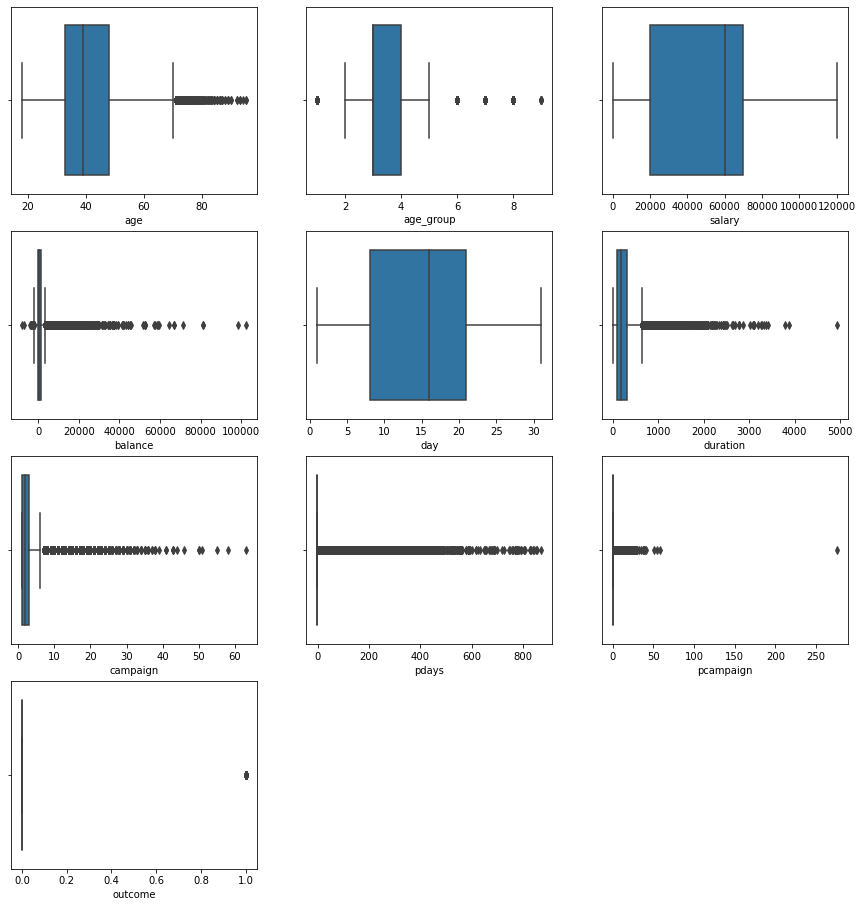

In [18]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

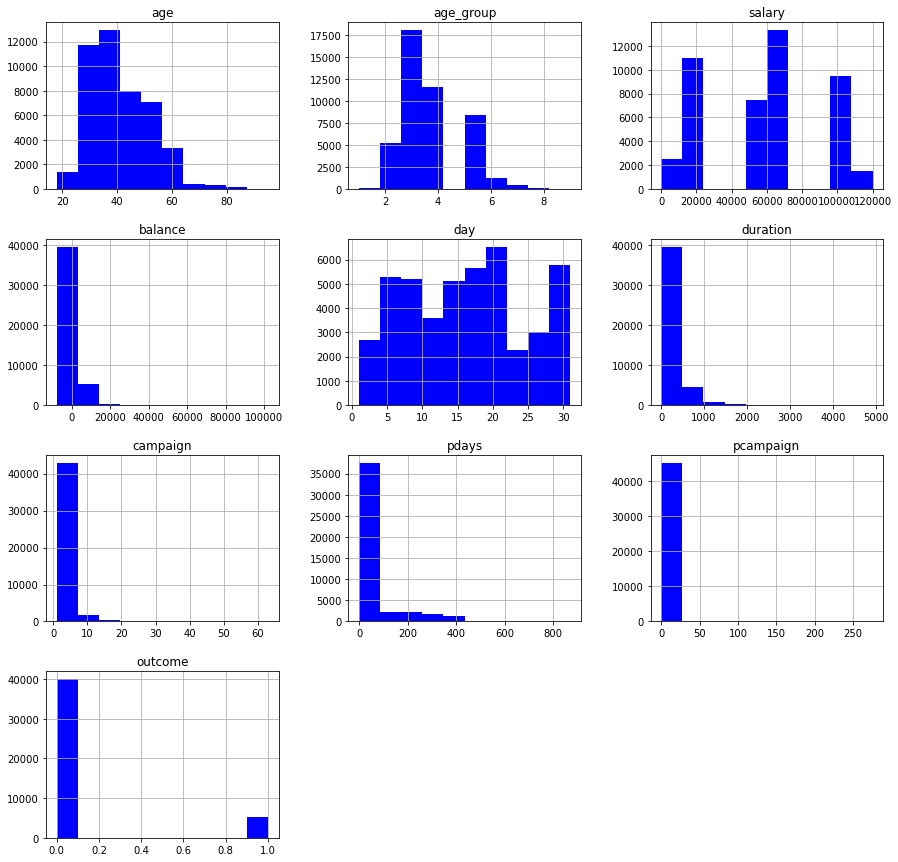

In [19]:
df.hist(figsize=(15,15),color='blue')
plt.show()

## Bivariate Analysis

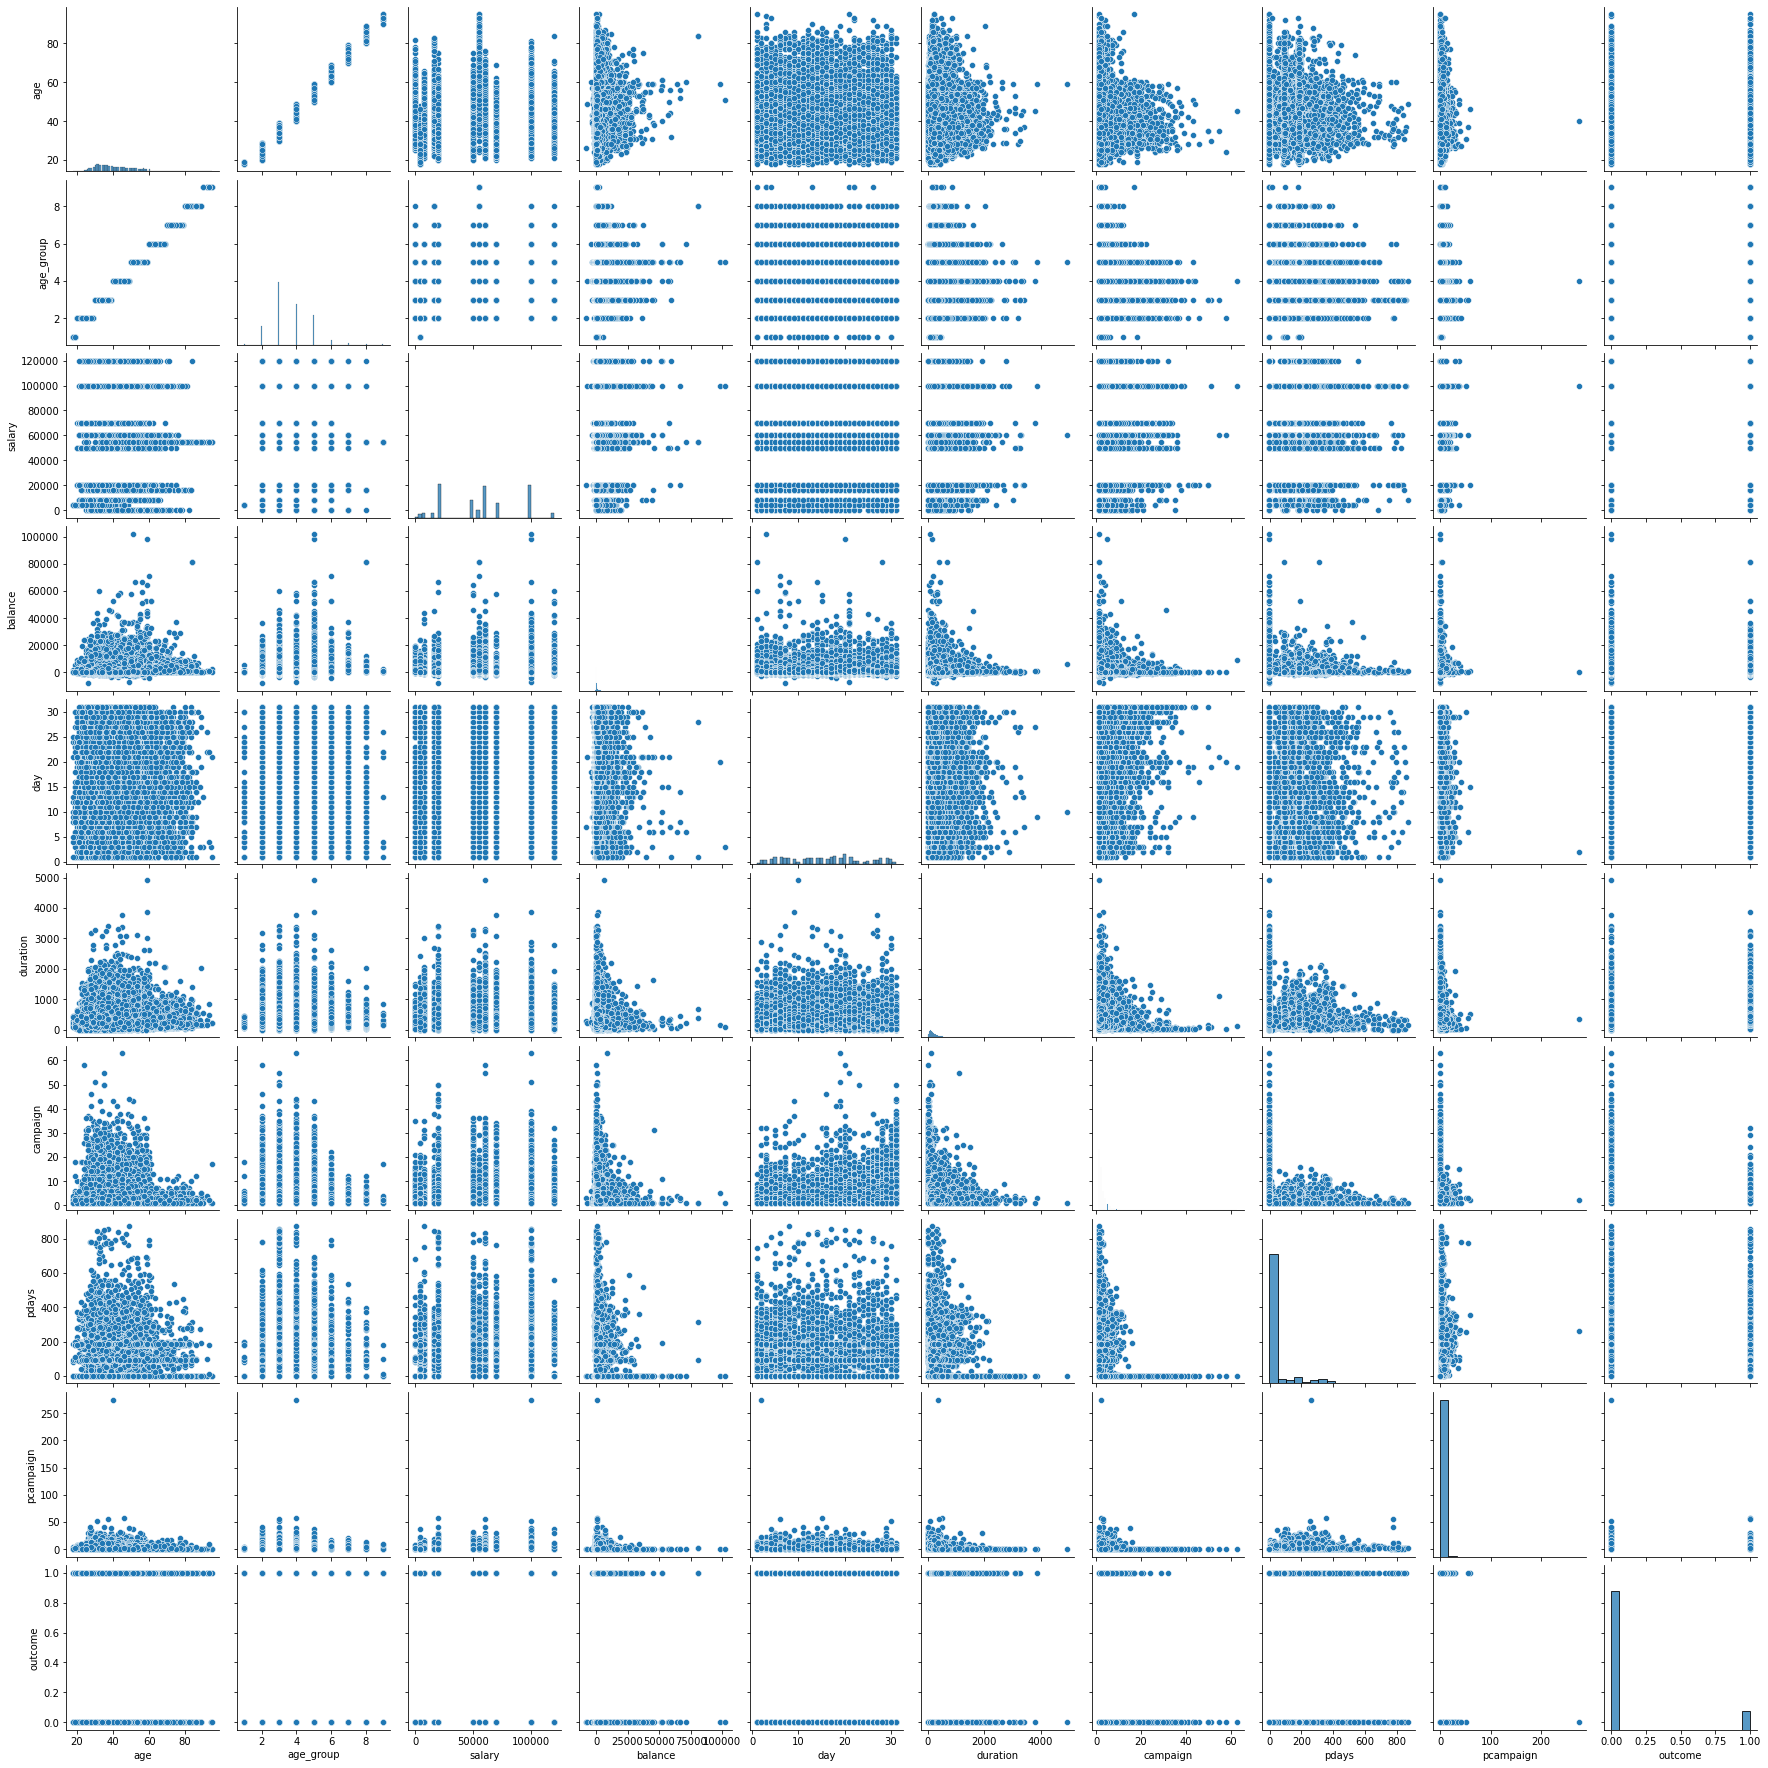

In [20]:
sns.pairplot(data=df)

In [21]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


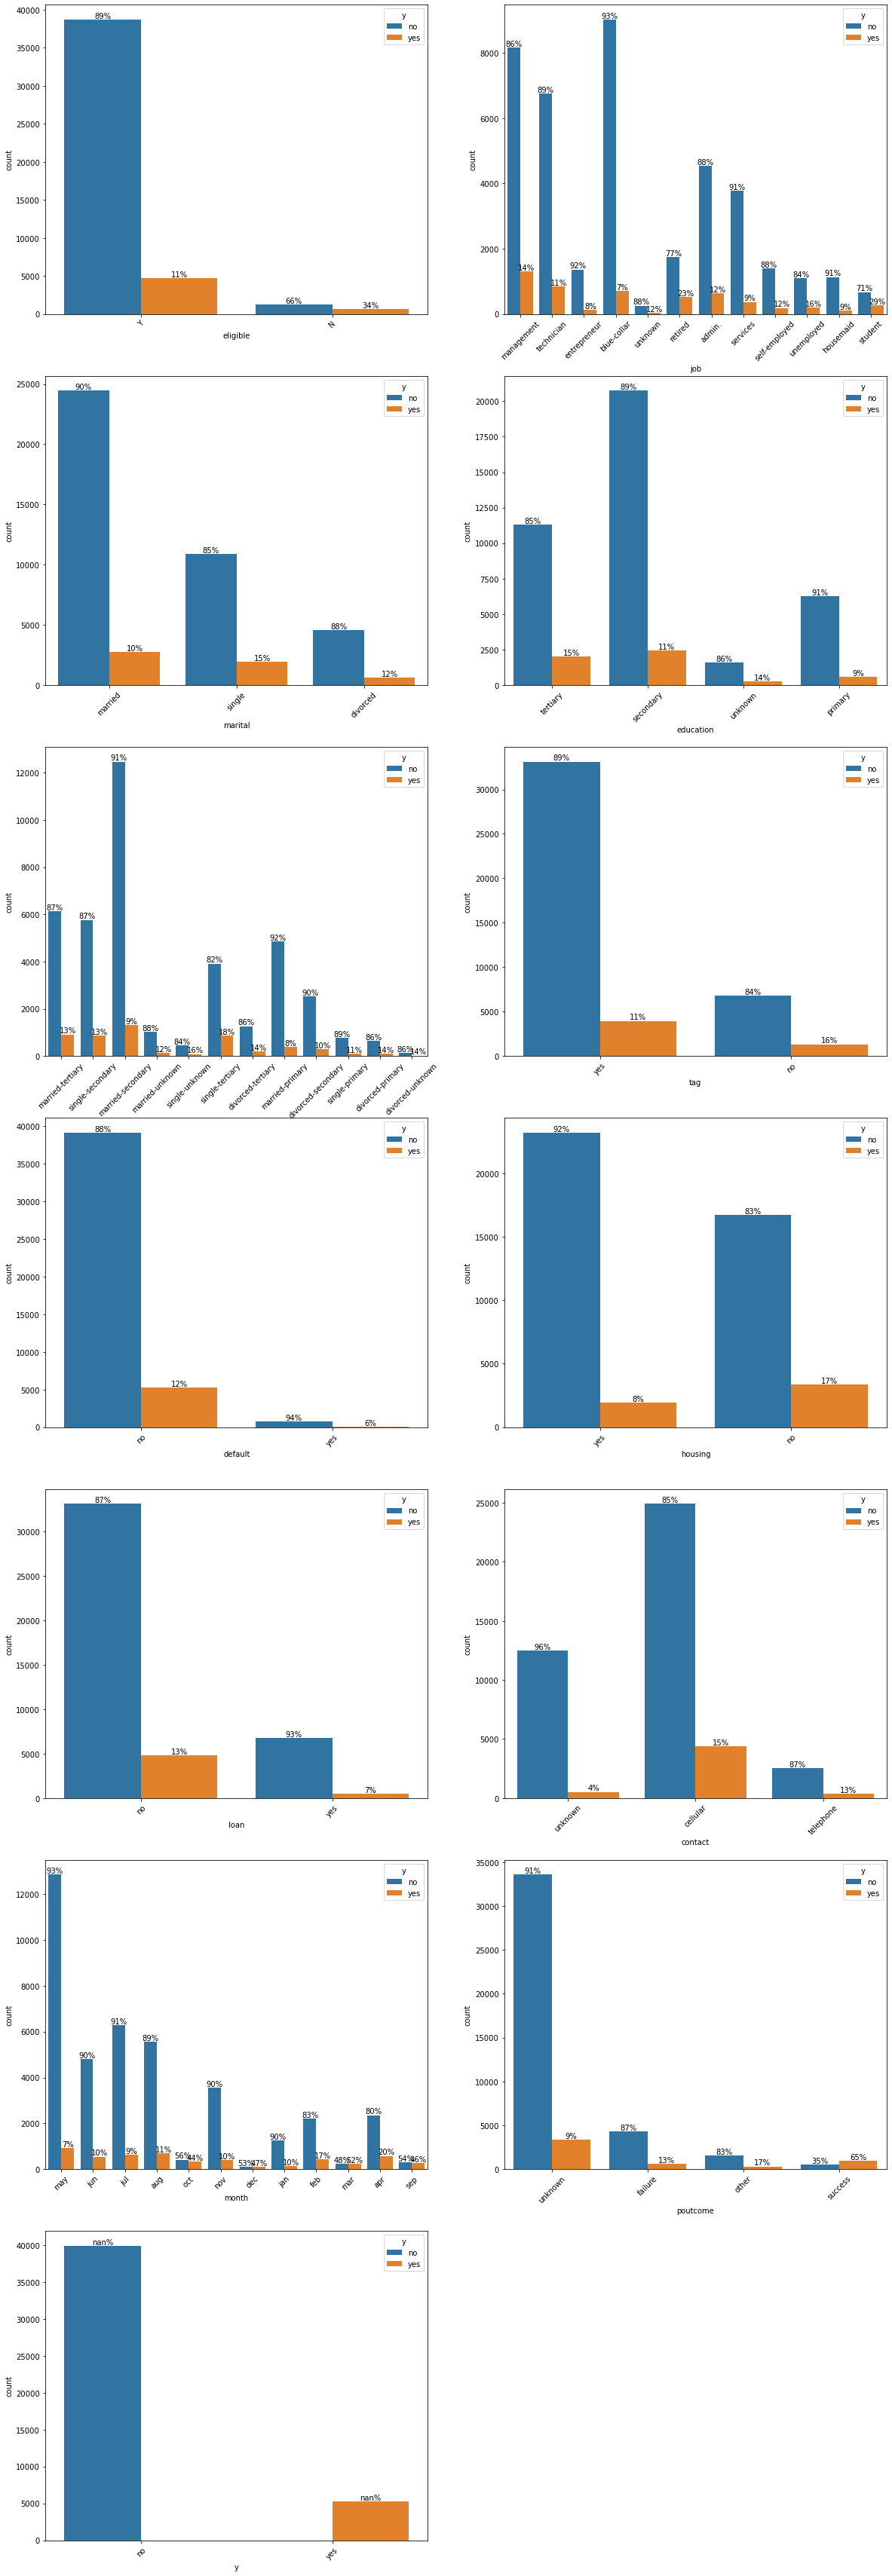

In [22]:
i=1
plt.figure(figsize=(20,80))
for col in cat_var:
    plt.subplot(9,2,i)
    ax=sns.countplot(data=df,x=col,hue='y')
    barPerc(df=df,xVar=col,ax=ax)
    plt.xticks(rotation=45)
    i+=1;

In [23]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

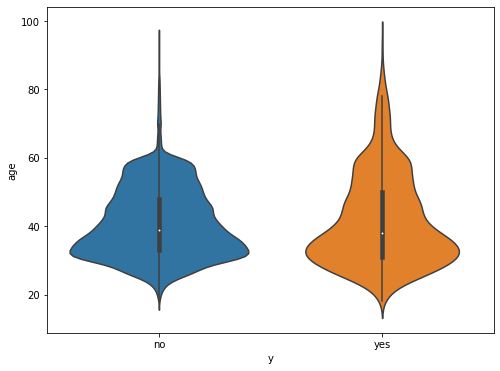

In [24]:
#violin plot for age
sns.violinplot(x="y", y="age", data=df, size=8)
plt.show();

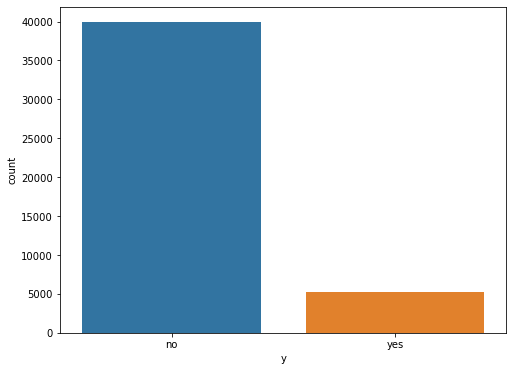

In [25]:
# count plot for deposit
#the dataset is clearly not balanced
sns.countplot(data=df,x=df['y']);

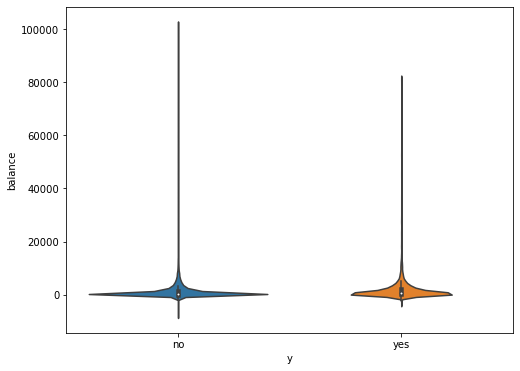

In [26]:
#violin plot for balance
sns.violinplot(x="y", y="balance", data=df, size=8)
plt.show()

In [27]:
less_0 =df.loc[(df['balance']<=0)].count()[0]
btw_0_1 =df.loc[(df['balance']>0) & (df['balance']<=1000)].count()[0]
btw_1_5 =df.loc[(df['balance']>1000) & (df['balance']<5000)].count()[0]
btw_5_10 =df.loc[(df['balance']>=5000) & (df['balance']<10000)].count()[0]
more_10 =df.loc[(df['balance']>=10000)].count()[0]

print(f'The amount of people with 0 or negative balance is {less_0}')
print(f'The amount of people with balance between 0 and 1000 is {btw_0_1}')
print(f'The amount of people with balance between 1000 and 5000 is {btw_1_5}')
print(f'The amount of people with balance between 5000 and 10000 is {btw_5_10}')
print(f'The amount of people with balance of more than 10000 is {more_10}')


The amount of people with 0 or negative balance is 7280
The amount of people with balance between 0 and 1000 is 23300
The amount of people with balance between 1000 and 5000 is 11784
The amount of people with balance between 5000 and 10000 is 2018
The amount of people with balance of more than 10000 is 829


In [28]:
df['balance'].min()

-8019

In [29]:
df['balance'].value_counts().sort_values()

3662       1
3428       1
3017       1
7051       1
3261       1
        ... 
3        134
4        139
2        156
1        195
0       3514
Name: balance, Length: 7168, dtype: int64

In [30]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

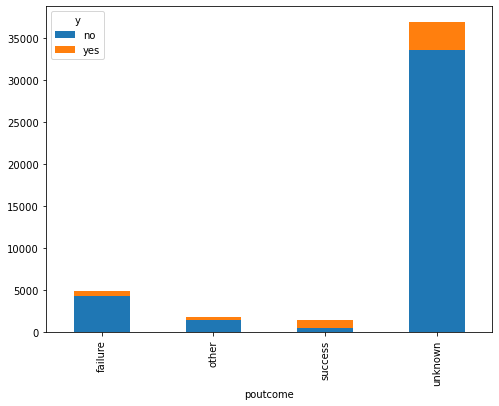

In [31]:
types = df.groupby("poutcome")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

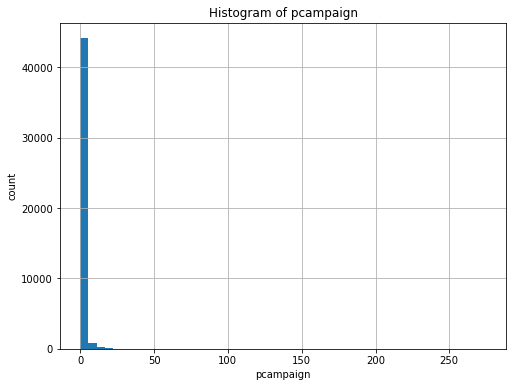

In [32]:
#histogram of previous
df['pcampaign'].hist(bins=50)
plt.title('Histogram of pcampaign')
plt.ylabel('count')
plt.xlabel('pcampaign');
plt.show()

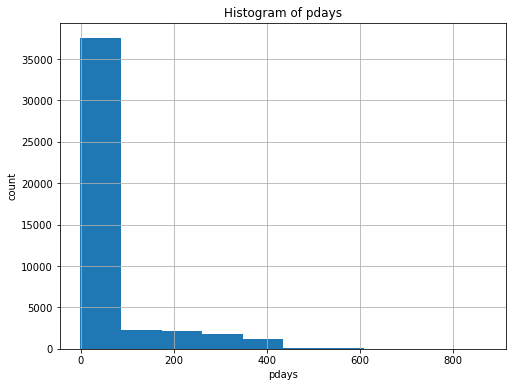

In [33]:
#histogram of pdays
df['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

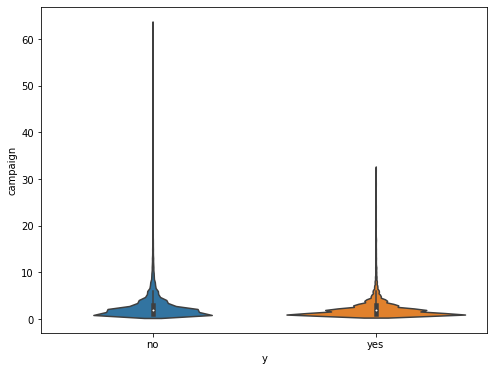

In [34]:
#violin plot for campaign
sns.violinplot(x="y", y="campaign", data=df, size=8)
plt.show()

<AxesSubplot:xlabel='month'>

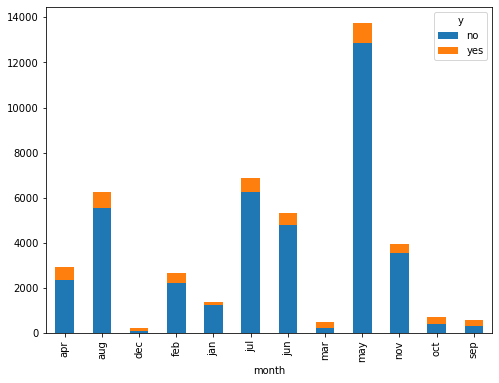

In [35]:
#bar chart for month
types = df.groupby("month")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='day'>

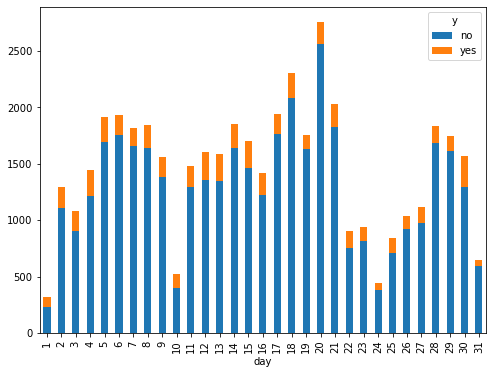

In [36]:
# group by days to display bar chart
types = df.groupby("day")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='contact'>

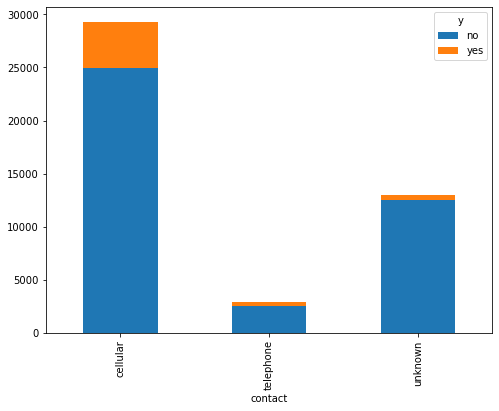

In [37]:
# group by contact to display bar chart
types = df.groupby("contact")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='loan'>

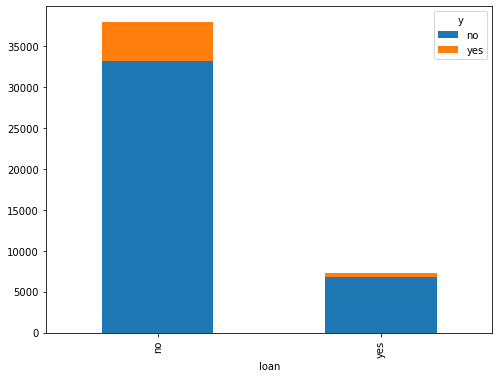

In [38]:
# group by loan to display bar chart
types = df.groupby("loan")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='marital'>

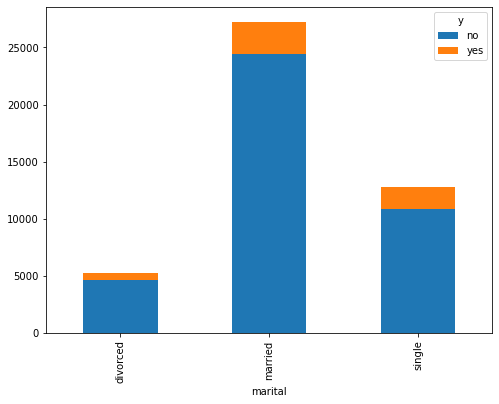

In [39]:
# group by marital to display bar chart
types = df.groupby("marital")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='housing'>

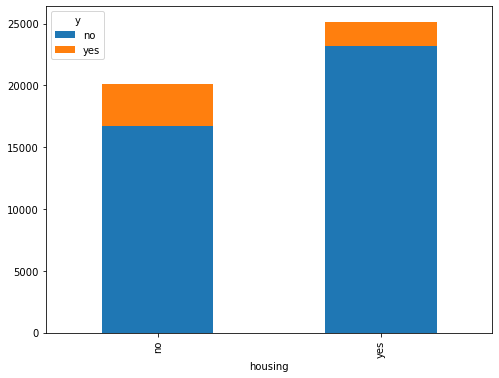

In [40]:
# group by housing to display bar chart
types = df.groupby("housing")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

We check the percentage of people with unknown job and salary = 0 with "yes" and "no" respone in the outcome.

In [41]:
df.loc[(df['salary']==0) & (df['job']=='unknown')]

,age,age_group,eligible,job,salary,marital,education,marital-education,tag,default,...,contact,day,month,duration,campaign,pdays,pcampaign,poutcome,y,outcome
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
216,47,4,Y,unknown,0,married,unknown,married-unknown,no,no,...,unknown,5,may,338,2,-1,0,unknown,no,0
354,59,5,Y,unknown,0,divorced,unknown,divorced-unknown,no,no,...,unknown,5,may,347,3,-1,0,unknown,no,0
876,37,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,7,may,131,1,-1,0,unknown,no,0
1072,29,2,Y,unknown,0,single,primary,single-primary,yes,no,...,unknown,7,may,50,2,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,4,Y,unknown,0,married,tertiary,married-tertiary,yes,no,...,cellular,7,sep,314,1,-1,0,unknown,yes,1
44742,64,6,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,9,sep,378,4,-1,0,unknown,no,0
44970,28,2,Y,unknown,0,single,unknown,single-unknown,no,no,...,cellular,11,oct,450,1,231,1,success,yes,1
45141,77,7,N,unknown,0,married,unknown,married-unknown,no,no,...,telephone,8,nov,207,1,185,3,success,no,0


In [42]:
all_samples=df.loc[(df['salary']==0)].count()[0]
people_yes=100*df.loc[(df['salary']==0) & (df['outcome']==0)].count()[0]/all_samples
people_no=100*df.loc[(df['salary']==0) & (df['outcome']==1)].count()[0]/all_samples

print(f'The % of the people with unknown job that took the deposit is {people_yes}')
print(f'The % of the people with unknown job that did NOT taje the deposit is {people_no}')

The % of the people with unknown job that took the deposit is 88.19444444444444
The % of the people with unknown job that did NOT taje the deposit is 11.805555555555555


Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more.

<AxesSubplot:xlabel='default'>

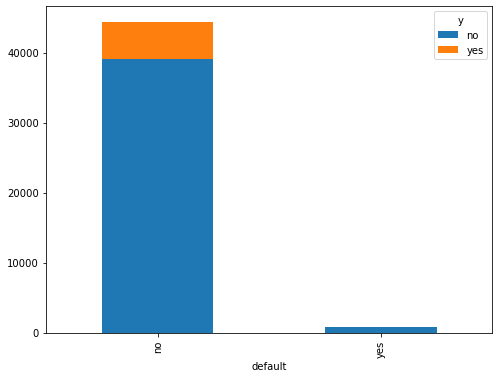

In [43]:
# group by default to display bar chart
types = df.groupby("default")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='job'>

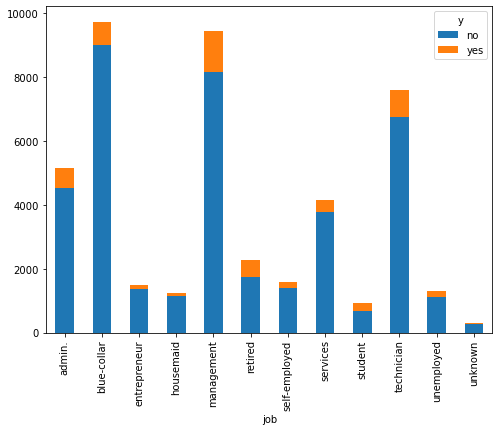

In [44]:
# group by job to display bar chart
types = df.groupby("job")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<AxesSubplot:xlabel='education'>

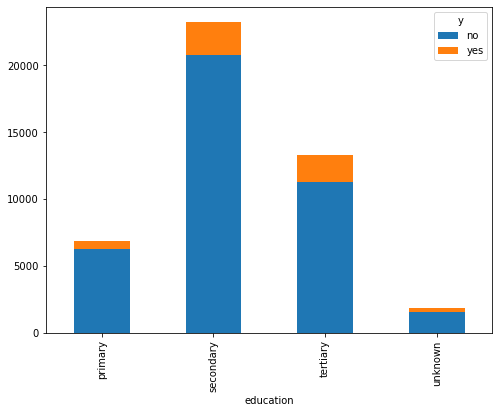

In [45]:
# group by job to display bar chart
types = df.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

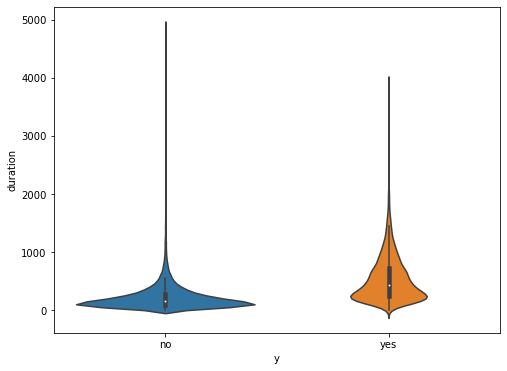

In [46]:
#violin plot for duration
sns.violinplot(x="y", y="duration", data=df, size=8)
plt.show()

In [47]:
correlacion = pd.DataFrame(df.corrwith(df['outcome']).sort_values())
correlacion.rename(columns={0: 'Correlacion con variable objetivo'}, inplace=True)
correlacion.drop(index='outcome',inplace=True)
correlacion

,Correlacion con variable objetivo
campaign,-0.073172
day,-0.028348
salary,0.020012
age_group,0.023382
age,0.025155
balance,0.052838
pcampaign,0.093236
pdays,0.103621
duration,0.394521


Text(0.5, 1.0, 'Variables correlation')

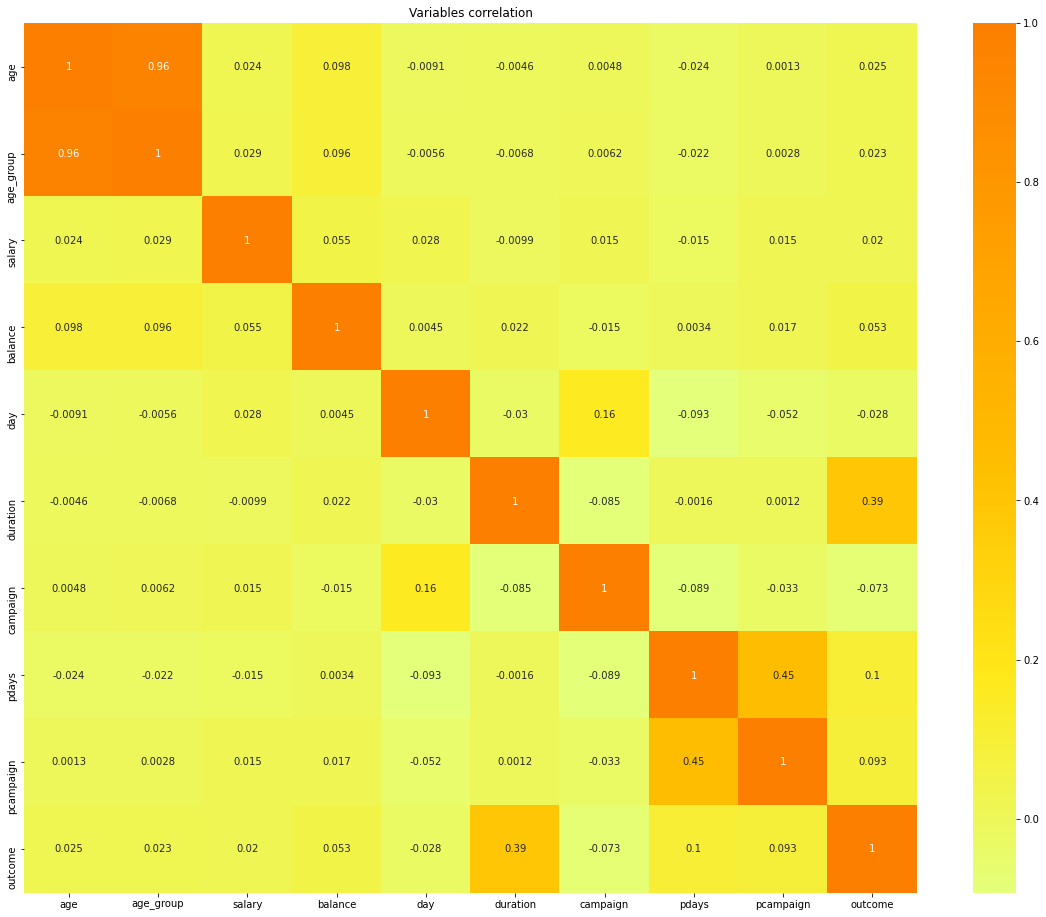

In [48]:
import phik
plt.rcParams['figure.figsize'] = (20, 16)
#Correlation for numeric variables 
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Variables correlation')

Observations:
- High linear correlation between **duration & outcome**, target variable.
- Some linear correlation between **days since last marketing campaign contact (pdays) & response**.
- High linear correlation between **pdays & amount of times contacted the client in previous campaign (pcampaign)**.
- Some linear correlation between **day of contact (day) & number of contacts to the client (campaign)**.

interval columns not set, guessing: ['age', 'age_group', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'pcampaign', 'outcome']


Text(0.5, 1.0, 'Variables correlation with phik')

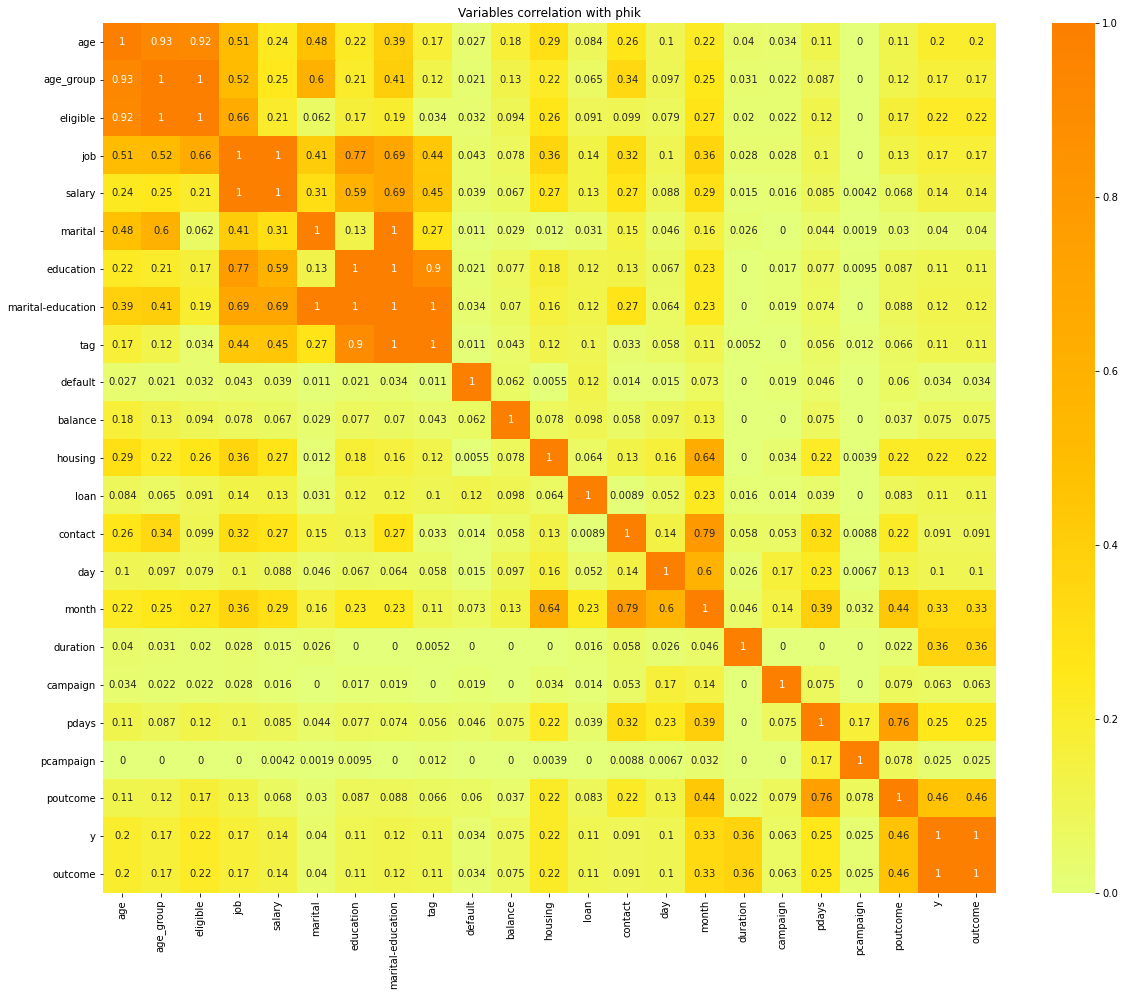

In [49]:
plt.rcParams['figure.figsize'] = (20, 16)
#It is use 'phik' correlation to be able to obtain correlation between categorical variables 
sns.heatmap(df.phik_matrix(), annot = True, cmap = 'Wistia')
plt.title('Variables correlation with phik')

Observation:
- The variables 'y' & 'outcome' have a correlation of **1** and the same correlation with other variables, confirming that they're the same varible, different expression.<br>
- The variable **outcome** is correlatead with the following variables, order from highest to lower:
    - **poutcome:** outcome in previous campaign.
    - **duration:** call duration in seconds.
    - **month**
    - **pdays**
    - **housing loan & eligible**
    - **age**
    - **job**
- The following variables have a high correlation between each other:
    - age, age group & eligible
    - job with the previous variables
    - **job & salary** with a correlation of **1**
    - **job, education & marital_education**
    - **education, marital_education & tag** **1 & 0.9**
    - **month & day**

After the EDA. We will drop some columns.  The column "duration" will not be taken in account for the prediction as this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. The columns 'y' also becuase its the same as the column outcome.
The other columns are indicated next.

In [50]:
df.drop(['duration','y'], axis =1, inplace=True)

We proceed to drop also columns that have high correlation such as "age" and "eligible", leaving "age_group". Also drop "marital", "education" and "tag", leaving "marital-education" untouched. The column "day" has very low correlation with the target variable, therefore, it will be dropped.
The column "contact" also has very low correlation
"balance"
"pcampaign"
"day"

In [51]:
df.drop(['age','eligible', 'marital','education','tag','day','pcampaign','balance'], axis =1, inplace=True)

In [52]:
df

,age_group,job,salary,marital-education,default,housing,loan,contact,month,campaign,pdays,poutcome,outcome
0,5,management,100000,married-tertiary,no,yes,no,unknown,may,1,-1,unknown,0
1,4,technician,60000,single-secondary,no,yes,no,unknown,may,1,-1,unknown,0
2,3,entrepreneur,120000,married-secondary,no,yes,yes,unknown,may,1,-1,unknown,0
3,4,blue-collar,20000,married-unknown,no,yes,no,unknown,may,1,-1,unknown,0
4,3,unknown,0,single-unknown,no,no,no,unknown,may,1,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,technician,60000,married-tertiary,no,no,no,cellular,nov,3,-1,unknown,1
45207,7,retired,55000,divorced-primary,no,no,no,cellular,nov,2,-1,unknown,1
45208,7,retired,55000,married-secondary,no,no,no,cellular,nov,5,184,success,1
45209,5,blue-collar,20000,married-secondary,no,no,no,telephone,nov,4,-1,unknown,0


# Preprocessing

### One-hot encoding

The column pdays indicates how many days passed by after the client was last contacted from a previous campaign. -1 indicates the client was never contacted before, so we will create a new column with binary values indicating if the client was previously contacted or not

df.loc[df['pdays']>=0,'pdays'] = 1
df.loc[df['pdays']<0,'pdays'] = 0

In [53]:
df

,age_group,job,salary,marital-education,default,housing,loan,contact,month,campaign,pdays,poutcome,outcome
0,5,management,100000,married-tertiary,no,yes,no,unknown,may,1,-1,unknown,0
1,4,technician,60000,single-secondary,no,yes,no,unknown,may,1,-1,unknown,0
2,3,entrepreneur,120000,married-secondary,no,yes,yes,unknown,may,1,-1,unknown,0
3,4,blue-collar,20000,married-unknown,no,yes,no,unknown,may,1,-1,unknown,0
4,3,unknown,0,single-unknown,no,no,no,unknown,may,1,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,technician,60000,married-tertiary,no,no,no,cellular,nov,3,-1,unknown,1
45207,7,retired,55000,divorced-primary,no,no,no,cellular,nov,2,-1,unknown,1
45208,7,retired,55000,married-secondary,no,no,no,cellular,nov,5,184,success,1
45209,5,blue-collar,20000,married-secondary,no,no,no,telephone,nov,4,-1,unknown,0


In [54]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,age_group,salary,campaign,pdays,outcome,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,5,100000,1,-1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,4,60000,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,120000,1,-1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,20000,1,-1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3,0,1,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Random Forest

In [57]:
#Model for parameter dictionary
parameters={'bootstrap': [True, False],
            'max_features': ['auto','sqrt','log2'],
            'min_samples_leaf': [1,4],
            'min_samples_split': [2,5],
            'max_depth':[2,5,8],
            'n_estimators': [200,500,1000],
            'max_leaf_nodes':[5,8],
            'class_weight':['balanced']
            # 'criterion' :['gini', 'entropy']
}
#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leaf int or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_split int or float, default=2. The minimum number of samples required to split an internal node
#n_estimatorsint, default=100. The number of trees in the forest.
#max_depth, The longest path between the root node and the leaf node

In [58]:
def random_forest(X_train, y_train, parameters, X_test, y_test):
    rf = RandomForestClassifier(n_jobs=6)

    #Gridsearch cv Training Random Forest for Accuracy
    clf=GridSearchCV(estimator = rf, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
    best_clf = clf.fit(X_train, y_train)
    # Training Random Forest
    # Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
    # get best parameters for retraining
    pred = best_clf.predict(X_test)
    accRF = accuracy_score(y_test, pred)
    y_pred_prob = best_clf.predict_proba(X_test)
    aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for Random Forest is ",aucScoreRF)
    print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
    predT=best_clf.predict(X_train)
    print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
    print("Best parameters for Random Forest are ",best_clf.best_params_)
    
    #Gridsearchcv Training Random Forest for recall
    clfR=GridSearchCV(estimator = rf, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
    best_clfR = clfR.fit(X_train, y_train)
    predR=best_clfR.predict(X_test)
    predRT=best_clfR.predict(X_train)
    recallRF=recall_score(y_test, predR)
    print("Test Recall score for RF is ",recallRF)
    print("Train recall score for RF is ",recall_score(y_train, predRT))
    print("Best parameters for recall of RF are ",best_clfR.best_params_)

## With df_dummy

### RF1 smote 5:1

In [59]:
# RF1 smote 5:1

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1,stratify=y)
smote = SMOTE(sampling_strategy= 0.2, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            'class_weight':['balanced']
            
            # 'criterion' :['gini', 'entropy']
}

random_forest(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[9324 2653]
 [ 603  984]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11977
           1       0.27      0.62      0.38      1587

    accuracy                           0.76     13564
   macro avg       0.60      0.70      0.61     13564
weighted avg       0.86      0.76      0.80     13564

AUC score for Random Forest is  0.7567940158776281
Test Accuracy score for Random Forest is  0.759952816278384
Train Accuracy score for Random Forest is  0.7586330291644301
Best parameters for Random Forest are  {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.6175173282923756
Train recall score for RF is  0.6511003757380569
Best parameters for recall of RF are  {'

### RF2 smote 3:1

In [65]:
# RF2 smote 3:1

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smote = SMOTE(sampling_strategy= 0.333333, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[11863   150]
 [ 1280   271]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.64      0.17      0.27      1551

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564

AUC score for Random Forest is  0.7650926518837347
Test Accuracy score for Random Forest is  0.8945738720141552
Train Accuracy score for Random Forest is  0.7886915159495848
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.172147001934236
Train recall score for RF is  0.17501612556439475
Best parameters for recall of RF are  {'bootstrap': False, 'max

### RF3 smote 2:1

In [66]:
# RF3 smote 2:1

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smote = SMOTE(sampling_strategy= 0.5, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[11532   481]
 [ 1124   427]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.47      0.28      0.35      1551

    accuracy                           0.88     13564
   macro avg       0.69      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564

AUC score for Random Forest is  0.7629964110983787
Test Accuracy score for Random Forest is  0.8816720731347685
Train Accuracy score for Random Forest is  0.7497790411580632
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.27014829142488717
Train recall score for RF is  0.306937078973771
Best parameters for recall of RF are  {'bootstrap': False, 'max

### RF4 smote 0.8

In [67]:
# RF4 smote 2:1

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smote = SMOTE(sampling_strategy= 0.8, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[10590  1423]
 [  784   767]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     12013
           1       0.35      0.49      0.41      1551

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.86      0.84      0.85     13564

AUC score for Random Forest is  0.7614764855803375
Test Accuracy score for Random Forest is  0.8372898849896786
Train Accuracy score for Random Forest is  0.7600923640417231
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.49258542875564154
Train recall score for RF is  0.6023200609127962
Best parameters for recall of RF are  {'bootstrap': False, 'ma

### RF5 smotetomek 4:1

In [70]:
# RF5 smotetomek
from imblearn.combine import SMOTETomek

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smotetomek = SMOTETomek(sampling_strategy= 0.25,random_state=1)
X_train_smote,y_train_smote = smotetomek.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[11917    96]
 [ 1330   221]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.70      0.14      0.24      1551

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.59     13564
weighted avg       0.88      0.89      0.86     13564

AUC score for Random Forest is  0.7678876306524369
Test Accuracy score for Random Forest is  0.8948687702742554
Train Accuracy score for Random Forest is  0.8270193837270959
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.14248871695680207
Train recall score for RF is  0.12432764714922391
Best parameters for recall of RF are  {'bootstrap': False, 'm

## Another df

In [60]:
df_encode = df

In [61]:
labelencoder_X = LabelEncoder()
df_encode['job']      = labelencoder_X.fit_transform(df_encode['job']) 
df_encode['marital-education']  = labelencoder_X.fit_transform(df_encode['marital-education']) 
df_encode['default']  = labelencoder_X.fit_transform(df_encode['default']) 
df_encode['housing']  = labelencoder_X.fit_transform(df_encode['housing']) 
df_encode['loan']     = labelencoder_X.fit_transform(df_encode['loan']) 
df_encode['contact']     = labelencoder_X.fit_transform(df_encode['contact']) 

In [62]:
labelencoder_X = LabelEncoder()

df_encode['contact']     = labelencoder_X.fit_transform(df_encode['contact']) 
df_encode['month']       = labelencoder_X.fit_transform(df_encode['month'])

In [63]:
df_encode

,age_group,job,salary,marital-education,default,housing,loan,contact,month,campaign,pdays,poutcome,outcome
0,5,4,100000,6,0,1,0,2,8,1,-1,unknown,0
1,4,9,60000,9,0,1,0,2,8,1,-1,unknown,0
2,3,2,120000,5,0,1,1,2,8,1,-1,unknown,0
3,4,1,20000,7,0,1,0,2,8,1,-1,unknown,0
4,3,11,0,11,0,0,0,2,8,1,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,9,60000,6,0,0,0,0,9,3,-1,unknown,1
45207,7,5,55000,0,0,0,0,0,9,2,-1,unknown,1
45208,7,5,55000,5,0,0,0,0,9,5,184,success,1
45209,5,1,20000,5,0,0,0,1,9,4,-1,unknown,0


In [64]:
df_encode['poutcome'].replace(['other','unknown','failure','success'],[1,1,2,3],inplace=True)

In [65]:
df_encode

,age_group,job,salary,marital-education,default,housing,loan,contact,month,campaign,pdays,poutcome,outcome
0,5,4,100000,6,0,1,0,2,8,1,-1,1,0
1,4,9,60000,9,0,1,0,2,8,1,-1,1,0
2,3,2,120000,5,0,1,1,2,8,1,-1,1,0
3,4,1,20000,7,0,1,0,2,8,1,-1,1,0
4,3,11,0,11,0,0,0,2,8,1,-1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,9,60000,6,0,0,0,0,9,3,-1,1,1
45207,7,5,55000,0,0,0,0,0,9,2,-1,1,1
45208,7,5,55000,5,0,0,0,0,9,5,184,3,1
45209,5,1,20000,5,0,0,0,1,9,4,-1,1,0


## With df_encode

In [66]:
def random_forest1(X_train, y_train, parameters, X_test, y_test):
    rf = RandomForestClassifier(n_jobs=6)
    skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
    #Gridsearch cv Training Random Forest for Accuracy
    clf=GridSearchCV(estimator = rf, param_grid = parameters, scoring='accuracy', cv = skf, verbose = True)
    best_clf = clf.fit(X_train, y_train)
    # Training Random Forest
    # Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
    # get best parameters for retraining
    pred = best_clf.predict(X_test)
    accRF = accuracy_score(y_test, pred)
    y_pred_prob = best_clf.predict_proba(X_test)
    aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for Random Forest is ",aucScoreRF)
    print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
    predT=best_clf.predict(X_train)
    print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
    print("Best parameters for Random Forest are ",best_clf.best_params_)
    
    #Gridsearchcv Training Random Forest for recall
    clfR=GridSearchCV(estimator = rf, param_grid = parameters,scoring='recall', cv = skf, verbose = True)
    best_clfR = clfR.fit(X_train, y_train)
    predR=best_clfR.predict(X_test)
    predRT=best_clfR.predict(X_train)
    recallRF=recall_score(y_test, predR)
    print("Test Recall score for RF is ",recallRF)
    print("Train recall score for RF is ",recall_score(y_train, predRT))
    print("Best parameters for recall of RF are ",best_clfR.best_params_)

### RF1 smote 3:1

In [67]:
# RF2 smote 3:1

X = df_encode.drop('outcome', axis=1) 
y = df_encode['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1,stratify=y)
smote = SMOTE(sampling_strategy= 0.333333, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            'class_weight':['balanced']
            # 'criterion' :['gini', 'entropy']
}

random_forest1(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[8670 3307]
 [ 606  981]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.82     11977
           1       0.23      0.62      0.33      1587

    accuracy                           0.71     13564
   macro avg       0.58      0.67      0.57     13564
weighted avg       0.85      0.71      0.76     13564

AUC score for Random Forest is  0.7478721687687582
Test Accuracy score for Random Forest is  0.7115157770569154
Train Accuracy score for Random Forest is  0.7121232453903755
Best parameters for Random Forest are  {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.6124763705103969
Train recall score for RF is  0.6966931500966287
Best parameters for recall of RF are  {

### RF2 smote 5:1

In [117]:
# RF2 smote 3:1
X = df_encode.drop('outcome', axis=1) 
y = df_encode['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=1)
smote = SMOTE(sampling_strategy= 0.5, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest1(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[18644  1315]
 [ 1643  1004]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     19959
           1       0.43      0.38      0.40      2647

    accuracy                           0.87     22606
   macro avg       0.68      0.66      0.67     22606
weighted avg       0.86      0.87      0.87     22606

AUC score for Random Forest is  0.7483935002152978
Test Accuracy score for Random Forest is  0.8691497832433868
Train Accuracy score for Random Forest is  0.7697034464333422
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.3668303740083113
Train recall score for RF is  0.4305179841699229
Best parameters for recall of RF are  {'bootstrap': False, 'max

### RF5 smotetomek 2:1

In [118]:
# RF5 smotetomek
from imblearn.combine import SMOTETomek

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smotetomek = SMOTETomek(sampling_strategy= 0.5,random_state=1)
X_train_smote,y_train_smote = smotetomek.fit_resample(X_train,y_train)


parameters={'bootstrap': [False],
            'max_features': ['auto'],
            'min_samples_leaf': [4],
            'min_samples_split': [2],
            'max_depth':[8],
            'n_estimators': [1500],
            'max_leaf_nodes':[8],
            # 'criterion' :['gini', 'entropy']
}

random_forest1(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[[11565   448]
 [ 1132   419]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     12013
           1       0.48      0.27      0.35      1551

    accuracy                           0.88     13564
   macro avg       0.70      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564

AUC score for Random Forest is  0.7640989937668536
Test Accuracy score for Random Forest is  0.8835151872603951
Train Accuracy score for Random Forest is  0.7485078081223963
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1500}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Test Recall score for RF is  0.2753062540296583
Train recall score for RF is  0.32142329839066885
Best parameters for recall of RF are  {'bootstrap': False, 'ma

### RF2 smote 3:1 multiple parameters

In [68]:
# RF2 smote 3:1
X = df_encode.drop('outcome', axis=1) 
y = df_encode['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1,stratify=y)
smote = SMOTE(sampling_strategy= 0.5, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [True, False],
            'max_features': ['auto','sqrt','log2'],
            'min_samples_leaf': [1,4],
            'min_samples_split': [2,5],
            'max_depth':[2,5,8],
            'n_estimators': [200,500,1000],
            'max_leaf_nodes':[5,8],
            'criterion' :['gini', 'entropy'],
            'class_weight':['balanced']
}

random_forest1(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[[9580 3595]
 [ 678 1067]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     13175
           1       0.23      0.61      0.33      1745

    accuracy                           0.71     14920
   macro avg       0.58      0.67      0.58     14920
weighted avg       0.85      0.71      0.76     14920

AUC score for Random Forest is  0.7448432876801705
Test Accuracy score for Random Forest is  0.7136058981233244
Train Accuracy score for Random Forest is  0.7204636091724825
Best parameters for Random Forest are  {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Test Recall score for RF is  0.6240687679083095
Train recall score for RF is  0.7284827637777611
Best para

### RF2 smote 4:1 multiple parameters

In [69]:
# RF2 smote 3:1
X = df_encode.drop('outcome', axis=1) 
y = df_encode['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1,stratify=y)
smote = SMOTE(sampling_strategy= 0.25, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


parameters={'bootstrap': [True, False],
            'max_features': ['auto','sqrt','log2'],
            'min_samples_leaf': [1,4,8],
            'min_samples_split': [2,5,8],
            'max_depth':[2,5,8],
            'n_estimators': [200,500,1000, 1500, 2000],
            'max_leaf_nodes':[2,5,8,10],
            'criterion' :['gini', 'entropy'],
            'class_weight':['balanced']
}

random_forest1(X_train_smote, y_train_smote, parameters, X_test, y_test)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
[[9706 2271]
 [ 668  919]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     11977
           1       0.29      0.58      0.38      1587

    accuracy                           0.78     13564
   macro avg       0.61      0.69      0.63     13564
weighted avg       0.86      0.78      0.81     13564

AUC score for Random Forest is  0.7540460741310575
Test Accuracy score for Random Forest is  0.78332350339133
Train Accuracy score for Random Forest is  0.7750994818356188
Best parameters for Random Forest are  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
Test Recall score for RF is  0.667296786389414
Train recall score for RF is  0.723160606928142
Best p

### Normalization

The data will be Standarized
- Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardised Data
- Tree based Algorithms are scale independant

In [50]:
temp_df = df_dummy['outcome']

In [51]:
df_dummy = df_dummy.drop('outcome',axis=1)

In [52]:
df_dummy['outcome'] = temp_df

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_dummy.drop('outcome',axis=1))
scaled_features=scaler.transform(df_dummy.drop('outcome',axis=1))
df_stand=pd.DataFrame(scaled_features,columns=df_dummy.columns[:-1])
df_stand.head()

,age_group,salary,balance,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.25006,1.339983,0.256419,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,1.944270,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.32692,0.093308,-0.437895,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.59622,1.963320,-0.446762,-0.569351,-0.411453,-0.25194,-0.523740,5.422561,-0.16793,-0.514332,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.32692,-1.153366,0.047205,-0.569351,-0.411453,-0.25194,1.909346,-0.184415,-0.16793,-0.514332,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.59622,-1.776703,-0.447091,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


In [54]:
df_stand['outcome'] = temp_df

In [61]:
df_stand[:]

,age_group,salary,balance,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,1.250060,1.339983,0.256419,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,1.944270,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
1,0.326920,0.093308,-0.437895,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
2,-0.596220,1.963320,-0.446762,-0.569351,-0.411453,-0.251940,-0.523740,5.422561,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
3,0.326920,-1.153366,0.047205,-0.569351,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
4,-0.596220,-1.776703,-0.447091,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.250060,0.093308,-0.176460,0.076230,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45207,3.096341,-0.062526,0.120447,-0.246560,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45208,3.096341,-0.062526,1.429593,0.721811,1.436189,1.050473,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,5.377848,-2.116316,1
45209,1.250060,-1.153366,-0.228024,0.399020,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0


In [56]:
# store standardised data in csv
df_stand.to_csv("standardisedBank.csv")

In [57]:
df_dummy.to_csv("dummiesBank.csv")

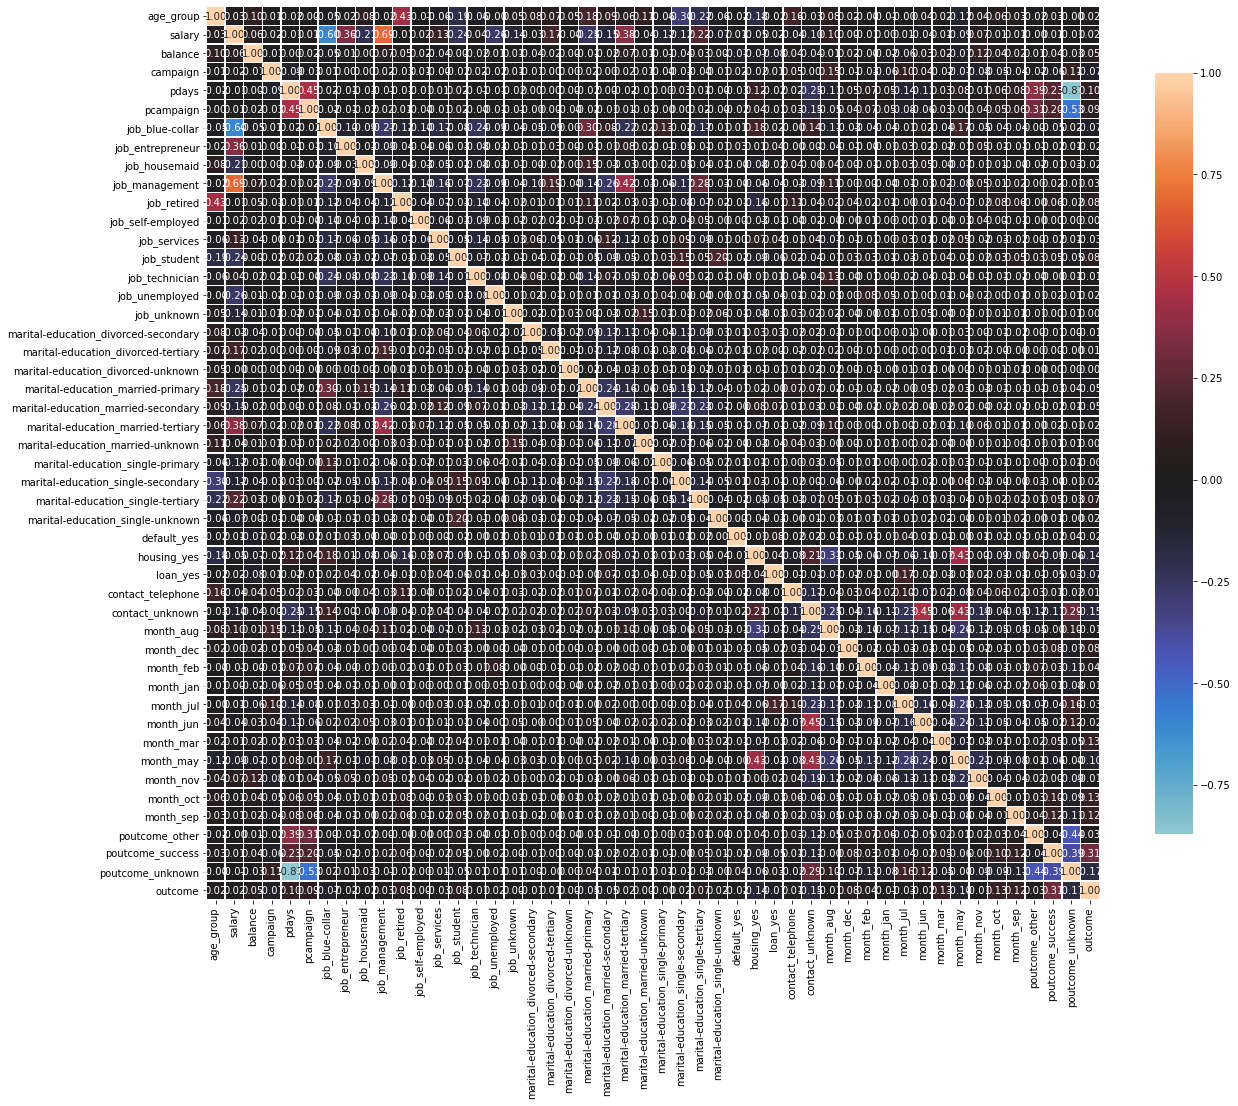

In [58]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_dummy)

In [62]:
df_stand

,age_group,salary,balance,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,1.250060,1.339983,0.256419,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,1.944270,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
1,0.326920,0.093308,-0.437895,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
2,-0.596220,1.963320,-0.446762,-0.569351,-0.411453,-0.251940,-0.523740,5.422561,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
3,0.326920,-1.153366,0.047205,-0.569351,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
4,-0.596220,-1.776703,-0.447091,-0.569351,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.250060,0.093308,-0.176460,0.076230,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45207,3.096341,-0.062526,0.120447,-0.246560,-0.411453,-0.251940,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
45208,3.096341,-0.062526,1.429593,0.721811,1.436189,1.050473,-0.523740,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,5.377848,-2.116316,1
45209,1.250060,-1.153366,-0.228024,0.399020,-0.411453,-0.251940,1.909346,-0.184415,-0.16793,-0.514332,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0


# Resampling

In [60]:
df_stand.groupby(['outcome']).agg({'loan':'count'}).rename(columns={'loan':'amount'})

SpecificationError: Column(s) ['loan'] do not exist

Data highly imbalanced

In [59]:
df_dummy

,age_group,salary,balance,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,5,100000,2143,1,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,4,60000,29,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,120000,2,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,20000,1506,1,-1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,3,0,1,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,60000,825,3,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,7,55000,1729,2,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,7,55000,5715,5,184,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,5,20000,668,4,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## RF with smote standarized

X = df_stand.drop('outcome', axis=1) 
y = df_stand['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
random_forest_1 = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2,n_estimators= 2000)

# An empty df is created to store the metrics of each alternative
column_names = ["Sampling", "recall", "precision","roc_auc", "FN","FP"]

pfm_smote = pd.DataFrame(columns = column_names)


smote_ratio = [0.25,0.33,0.40]
for i in range(len(smote_ratio)):
    #Fitting the model
    smote = SMOTE(sampling_strategy= smote_ratio[i], random_state= 1)
    X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
    

    random_forest_1.fit(X_train_smote,y_train_smote)

    y_train_prf = random_forest_1.predict(X_train) #Train prediction
    y_test_prf = random_forest_1.predict(X_test) #Test prediction

    #METRICS 

    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)

    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)

    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)

    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)

    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)

    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    option = {"Sampling": smote_ratio[i], "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

## RF with smote not standarized

X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
random_forest_2 = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2,n_estimators= 2000)

# An empty df is created to store the metrics of each alternative
column_names = ["Sampling", "recall", "precision","roc_auc", "FN","FP"]

pfm_smote = pd.DataFrame(columns = column_names)


smote_ratio = [0.25,0.33,0.40]
for i in range(len(smote_ratio)):
    #Fitting the model
    smote = SMOTE(sampling_strategy= smote_ratio[i], random_state= 1)
    X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
    

    random_forest_2.fit(X_train_smote,y_train_smote)

    y_train_prf = random_forest_2.predict(X_train) #Train prediction
    y_test_prf = random_forest_2.predict(X_test) #Test prediction

    #METRICS 

    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)

    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)

    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)

    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)

    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)

    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    option = {"Sampling": smote_ratio[i], "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "FN": fn,"FP": fp}
    pfm_smote = pfm_smote.append(option, ignore_index = True)
    
pfm_smote

## RF with undersampling standarized 

X = df_stand.drop('outcome', axis=1) 
y = df_stand['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

random_forest_2 = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2,n_estimators= 2000)

# An empty df is created to store the metrics of each alternative
column_names = ["Sampling", "recall", "precision","roc_auc", "FN","FP"]

pfm_under = pd.DataFrame(columns = column_names)


undersample_ratio = [0.8,0.6, 0.5, 0.4]
for i in range(len(smote_ratio)):
    #Fitting the model
    under = RandomUnderSampler(undersample_ratio[i],random_state= 1)
    X_train_under,y_train_under = smote.fit_resample(X_train,y_train)
    

    random_forest_2.fit(X_train_under,y_train_under)

    y_train_prf = random_forest_2.predict(X_train) #Train prediction
    y_test_prf = random_forest_2.predict(X_test) #Test prediction

    #METRICS 

    #Recall in Train
    train_recall = skm.recall_score(y_train, y_train_prf)

    #Recall in Test
    test_recall = skm.recall_score(y_test, y_test_prf)

    #precision in Train
    train_precision = skm.precision_score(y_train, y_train_prf)

    #precision in Test
    test_precision = skm.precision_score(y_test, y_test_prf)

    #ROC AUC in Test
    roc_auc = skm.roc_auc_score(y_test, y_test_prf)

    #Confusion matrix
    fn = skm.confusion_matrix(y_test, y_test_prf)[1][0]
    fp = skm.confusion_matrix(y_test, y_test_prf)[0][1]

    option = {"Sampling": undersample_ratio[i], "recall":test_recall, "precision": test_precision,"roc_auc": roc_auc, "FN": fn,"FP": fp}
    pfm_under = pfm_under.append(option, ignore_index = True)
    
pfm_under

## Random Forest with GridSearch and CV

### 1) RF 2 - df_over_1 - SMOTE 1:3 - No normalization

In [60]:
X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smote = SMOTE(sampling_strategy= 0.2, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


In [61]:
X_train_smote

,age_group,salary,balance,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,3,20000,-238,1,-1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3,50000,-478,4,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,3,60000,266,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,20000,13,4,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,4000,486,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33485,3,20000,729,1,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33486,2,8000,1708,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33487,3,100000,81,3,382,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
33488,3,50000,190,9,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


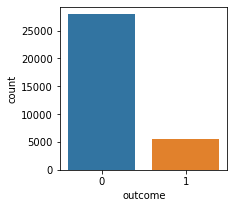

In [62]:
plt.figure(figsize=(3,3))
sns.countplot(y_train_smote);

In [63]:
rf2_1 = RandomForestClassifier(n_jobs=6)

parameters={'bootstrap': [True, False],
            'max_features': ['auto','sqrt','log2'],
            'min_samples_leaf': [1,4],
            'min_samples_split': [2,5],
            'max_depth':[2,5,8],
            'n_estimators': [200,500,1000],
            'max_leaf_nodes':[5,8],
            # 'criterion' :['gini', 'entropy']
            }

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leaf int or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_split int or float, default=2. The minimum number of samples required to split an internal node
#n_estimatorsint, default=100. The number of trees in the forest.
#max_depth, The longest path between the root node and the leaf node

In [64]:
clf=GridSearchCV(estimator = rf2_1, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train_smote,y_train_smote)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [65]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11929    84]
 [ 1354   197]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.70      0.13      0.22      1551

    accuracy                           0.89     13564
   macro avg       0.80      0.56      0.58     13564
weighted avg       0.88      0.89      0.86     13564

AUC score for Random Forest is  0.7653815340709504
Test Accuracy score for Random Forest is  0.8939840754939545
Train Accuracy score for Random Forest is  0.8902265617594085
Best parameters for Random Forest are  {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}


In [66]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_1, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [67]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.11863313990973566
Train recall score for RF is  0.10941680042803638
Best parameters for recall of RF are  {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 2) RF 2 - df_over_1 - SMOTE 1:3 - No normalization

In [71]:
X = df_dummy.drop('outcome', axis=1) 
y = df_dummy['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)
smote = SMOTE(sampling_strategy= 0.5, random_state= 1)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)


In [72]:
X_train_smote

,age_group,salary,balance,day,campaign,pdays,pcampaign,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,3,20000,-238,27,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3,50000,-478,27,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,3,60000,266,19,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,20000,13,3,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,4000,486,3,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41858,4,20000,-10,3,1,93,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41859,2,60000,-131,21,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41860,3,100000,1751,27,3,416,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41861,3,60000,-500,20,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


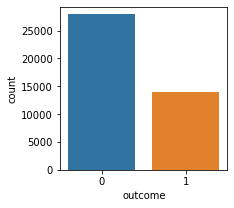

In [73]:
plt.figure(figsize=(3,3))
sns.countplot(y_train_smote);

In [76]:
rf2_1 = RandomForestClassifier(n_jobs=6)

parameters={'bootstrap': [True, False],
            'max_features': ['auto','sqrt','log2'],
            'min_samples_leaf': [1,4],
            'min_samples_split': [2,5],
            'max_depth':[2,5],
            'n_estimators': [200,500,1000],
            'max_leaf_nodes':[5,8],
            # 'criterion' :['gini', 'entropy']
            }

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leaf int or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_split int or float, default=2. The minimum number of samples required to split an internal node
#n_estimatorsint, default=100. The number of trees in the forest.
#max_depth, The longest path between the root node and the leaf node

In [77]:
clf=GridSearchCV(estimator = rf2_1, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train_smote,y_train_smote)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [78]:
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11535   478]
 [ 1172   379]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.24      0.31      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.60      0.62     13564
weighted avg       0.85      0.88      0.86     13564

AUC score for Random Forest is  0.7601856263279793
Test Accuracy score for Random Forest is  0.8783544677086406
Train Accuracy score for Random Forest is  0.8785350902139223
Best parameters for Random Forest are  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [79]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_1, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [80]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.24564796905222436
Train recall score for RF is  0.24264312466559657
Best parameters for recall of RF are  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


## Undersampling

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


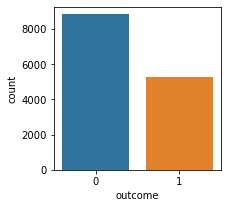

In [55]:
# instantiating over and under sampler
under = RandomUnderSampler(sampling_strategy=0.6)
# first performing oversampling to minority class
# X_over, y_over = over.fit_resample(X, y)
# now to comine under sampling 
# X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
# print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
X, y = under.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_under_1 = pd.DataFrame(X)
df_under_1['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_under_1['outcome']);

In [56]:
df_under_1

,age,age_group,salary,balance,day,pdays,pcampaign,eligible_Y,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,outcome
0,0.006007,0.326920,1.339983,-0.442164,0.864365,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
1,-1.029906,-0.596220,0.093308,-0.446434,1.465155,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
2,1.041921,1.250060,0.093308,-0.207661,1.705471,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,7.762829,-0.113898,-0.205972,-0.185948,0.472519,0
3,-0.464863,-0.596220,0.093308,-0.447419,-1.178318,2.115532,0.616335,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,4.855018,-0.185948,-2.116316,0
4,1.230269,1.250060,0.093308,-0.269407,-1.178318,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14099,3.019575,3.096341,-0.062526,0.488624,0.143418,2.115532,3.221163,-4.867440,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,-2.116316,1
14100,-1.500776,-1.519360,0.093308,-0.281559,0.143418,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
14101,0.947747,1.250060,0.093308,-0.176460,0.143418,-0.472694,-0.251940,0.205447,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1
14102,2.831227,3.096341,-0.062526,0.120447,0.143418,-0.472694,-0.251940,-4.867440,-0.52374,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.205972,-0.185948,0.472519,1


## Oversampling

## Oversampling all data using SMOTE

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


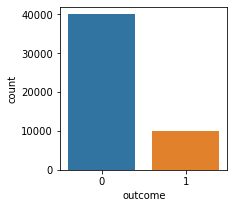

In [58]:
#Oversampling the data 4:1
smote = SMOTE(random_state=1, sampling_strategy=0.25)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_1 = pd.DataFrame(X)
df_over_1['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_1['outcome']);

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


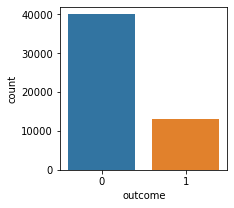

In [59]:
#Oversampling the data 3:1
smote = SMOTE(random_state=1, sampling_strategy=0.33)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_2 = pd.DataFrame(X)
df_over_2['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_2['outcome']);

C:\Users\Nico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


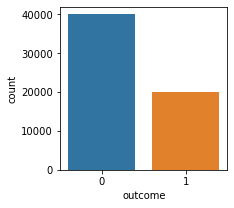

In [60]:
#Oversampling the data 3:1
smote = SMOTE(random_state=1, sampling_strategy=0.5)
X, y = smote.fit_resample(df_stand.loc[:,df_stand.columns != 'outcome'], df_stand['outcome'])
df_over_3 = pd.DataFrame(X)
df_over_3['outcome']=y
plt.figure(figsize=(3,3))
sns.countplot(df_over_3['outcome']);

The new dataframes where the SMOTE oversampling technique was applied are:
- df_over_1 with a ratio on the outcome variable of 4:1
- df_over_2 with a ratio on the outcome variable of 3:1
- df_over_3 with a ratio on the outcome variable of 2:1
- df_under_1 with 14000 rows (originally 41000)

# Machine Learning 

The way we proced is: 
1) In the Preprocessing stage the data was normalized. 
2) SMOTE was applied. Three new datasets where created following the ratio for the outcome variable as 4:1, 3:1 and 2:1
3) Random Forest 1 applied to each dataset


IN PROGRESS

## Importing Libraries for ML

## Slicing Data

In [62]:
#Spliting entry from target
X1 = df_over_1.drop('outcome', axis=1) 
y1 = df_over_1['outcome'] 

X2 = df_over_2.drop('outcome', axis=1) 
y2 = df_over_2['outcome'] 

X3 = df_over_3.drop('outcome', axis=1) 
y3 = df_over_3['outcome']

X4 = df_under_1.drop('outcome', axis=1) 
y4 = df_under_1['outcome'] 


## Random Forest 1

### 1) RF 1 - df_over_1 - SMOTE 4:1

In [63]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

rf1_1 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_1.fit(X_train,y_train)

y_train_prf = rf1_1.predict(X_train) #Train prediction
y_test_prf = rf1_1.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.6319681456200228
% of correct positive predictions according to the truth in test set: 0.6339891451831751
Indicator of incorrect predictions in training set: 0.5134900918597262
Indicator of incorrect predictions in testing set: 0.5193109196999167
Logistic ROC AUC 0.718


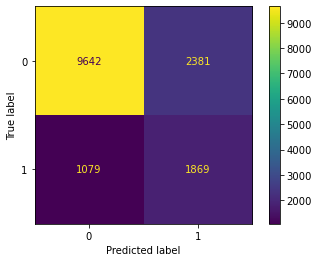

In [64]:
skm.plot_confusion_matrix(rf1_1, X_test, y_test)

### 2)  RF 1 - df_over_2 - SMOTE 3:1

In [65]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.30, random_state=1)

rf1_2 = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2,n_estimators= 2000)

#Fitting the model
rf1_2.fit(X_train,y_train)

y_train_prf = rf1_2.predict(X_train) #Train prediction
y_test_prf = rf1_2.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.6783713916415338
% of correct positive predictions according to the truth in test set: 0.6781491002570694
Indicator of incorrect predictions in training set: 0.5713767294171015
Indicator of incorrect predictions in testing set: 0.5705634259759923
Logistic ROC AUC 0.726


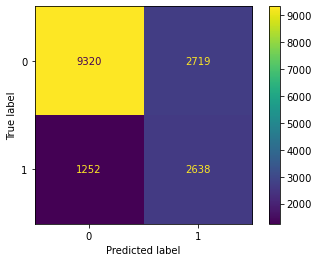

In [66]:
skm.plot_confusion_matrix(rf1_2, X_test, y_test)

### 3)  RF 1 - df_over_3 - SMOTE 2:1

In [67]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.30, random_state=1)

rf1_3 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_3.fit(X_train,y_train)

y_train_prf = rf1_3.predict(X_train) #Train prediction
y_test_prf = rf1_3.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.7085839643337344
% of correct positive predictions according to the truth in test set: 0.7138936535162951
Indicator of incorrect predictions in training set: 0.649962675667781
Indicator of incorrect predictions in testing set: 0.6462732919254659
Logistic ROC AUC 0.738


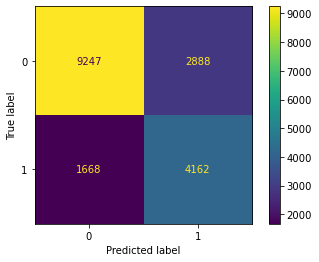

In [68]:
skm.plot_confusion_matrix(rf1_3, X_test, y_test)

### 4) RF 1 - df_under_1 - Undersampling

In [69]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

rf1_4 = RandomForestClassifier(max_depth = 4 ,random_state=1, n_estimators=200,
                               class_weight="balanced", max_features="log2")

#Fitting the model
rf1_4.fit(X_train,y_train)

y_train_prf = rf1_4.predict(X_train) #Train prediction
y_test_prf = rf1_4.predict(X_test) #Test prediction

#Recall in Train
train_recall = skm.recall_score(y_train, y_train_prf)
#Recall in Test
test_recall = skm.recall_score(y_test, y_test_prf)

print('% of correct positive predictions according to the truth in training set:', train_recall)
print('% of correct positive predictions according to the truth in test set:',test_recall)

#f1 in Train
train_f1 = skm.f1_score(y_train, y_train_prf)
#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_prf)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

roc_auc = roc_auc_score(y_test, y_test_prf)
print('Logistic ROC AUC %.3f' % roc_auc)

% of correct positive predictions according to the truth in training set: 0.5746471226927253
% of correct positive predictions according to the truth in test set: 0.5457943925233645
Indicator of incorrect predictions in training set: 0.6015913611821541
Indicator of incorrect predictions in testing set: 0.5851703406813628
Logistic ROC AUC 0.675


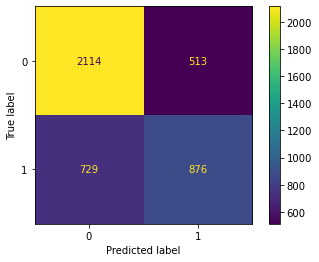

In [70]:
skm.plot_confusion_matrix(rf1_4, X_test, y_test)

### Random Forest 1 Feature Importance

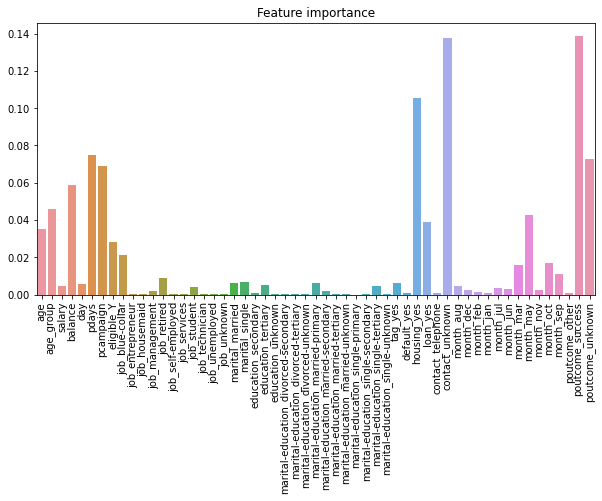

In [71]:
plt.figure(figsize=(10,5))
importances = rf1_1.feature_importances_
columns = X1.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

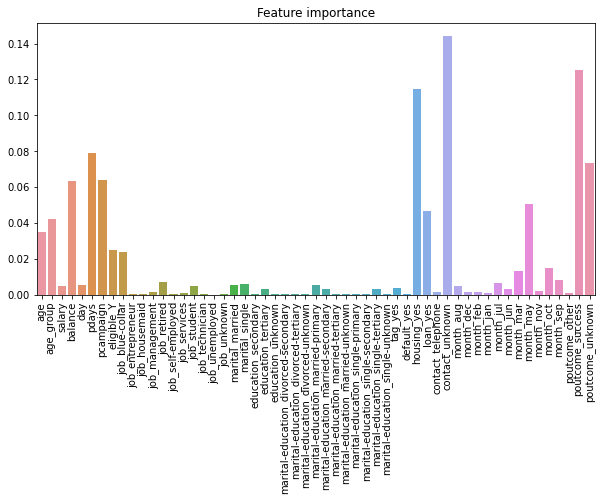

In [72]:
plt.figure(figsize=(10,5))
importances = rf1_2.feature_importances_
columns = X2.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

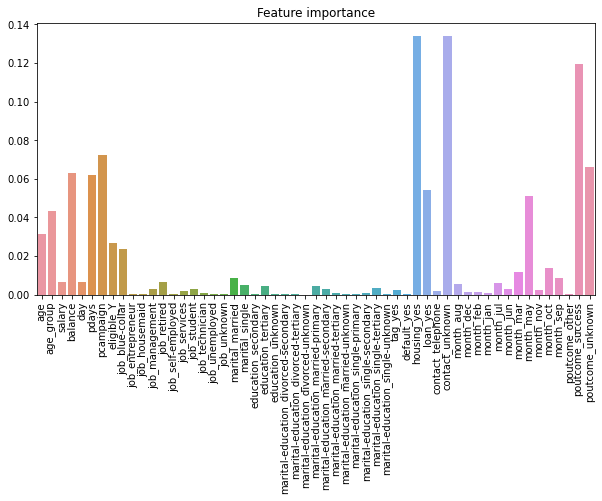

In [73]:
plt.figure(figsize=(10,5))
importances = rf1_3.feature_importances_
columns = X3.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

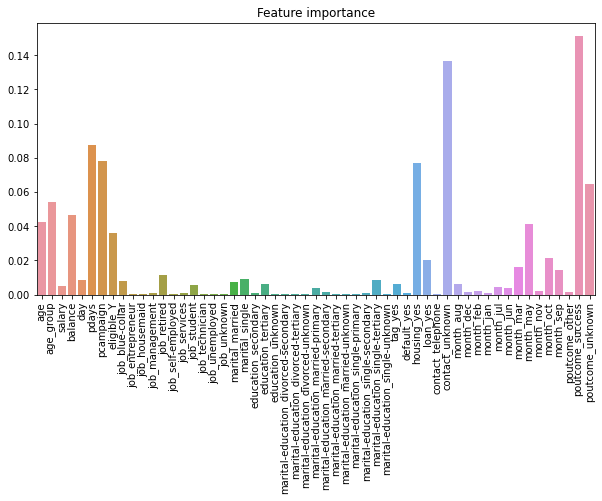

In [74]:
plt.figure(figsize=(10,5))
importances = rf1_4.feature_importances_
columns = X4.columns
sns.barplot(columns, importances)
plt.title('Feature importance')
plt.xticks(rotation = 90)
plt.show()

## Random Forest 2

### 1) RF 2 - df_over_1 - SMOTE 4:1

In [75]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [76]:
rf2_1 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [77]:
clf=GridSearchCV(estimator = rf2_1, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11690   333]
 [ 1263  1685]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     12023
           1       0.83      0.57      0.68      2948

    accuracy                           0.89     14971
   macro avg       0.87      0.77      0.81     14971
weighted avg       0.89      0.89      0.89     14971

AUC score for Random Forest is  0.8948741083208787
Test Accuracy score for Random Forest is  0.8933938948634026
Train Accuracy score for Random Forest is  0.9979101657553463
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [79]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_1, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [80]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.585820895522388
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


### 2) RF 2 - df_over_2 - SMOTE 3:1

In [81]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.30, random_state=1)

In [82]:
rf2_2 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [83]:
clf=GridSearchCV(estimator = rf2_2, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11646   393]
 [ 1267  2623]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12039
           1       0.87      0.67      0.76      3890

    accuracy                           0.90     15929
   macro avg       0.89      0.82      0.85     15929
weighted avg       0.89      0.90      0.89     15929

AUC score for Random Forest is  0.9267898396193519
Test Accuracy score for Random Forest is  0.8957875572854542
Train Accuracy score for Random Forest is  0.9980089864664891
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [85]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_2, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [86]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.6922879177377892
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


### 3) RF 2 - df_over_3 - SMOTE 2:1

In [87]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.30, random_state=1)

In [88]:
rf2_3 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [89]:
clf=GridSearchCV(estimator = rf2_3, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[11653   482]
 [ 1163  4667]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12135
           1       0.91      0.80      0.85      5830

    accuracy                           0.91     17965
   macro avg       0.91      0.88      0.89     17965
weighted avg       0.91      0.91      0.91     17965

AUC score for Random Forest is  0.9551032021829886
Test Accuracy score for Random Forest is  0.9084330642916782
Train Accuracy score for Random Forest is  0.9986640583997328
Best parameters for Random Forest are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [91]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_3, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [92]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.8058319039451115
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 4) RF 2 - df_under_1 - Undersampling

In [93]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [94]:
rf2_4 = RandomForestClassifier()

parameters={'bootstrap': [True,False],
            'max_features': ['auto','sqrt'],
            'min_samples_leaf': [1,2],
            'min_samples_split': [2,5],
            'n_estimators': [200,400]}

#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”. The number of features to consider when looking for the best split:
#min_samples_leafint or float, default=1, The minimum number of samples required to be at a leaf node. 
#min_samples_splitint or float, default=2. The minimum number of samples required to split an internal node
# n_estimatorsint, default=100. The number of trees in the forest.

In [95]:
clf=GridSearchCV(estimator = rf2_4, param_grid = parameters, scoring='accuracy', cv = 5, verbose = True)
best_clf = clf.fit(X_train,y_train)

#GridSearchCV
#cv: Determines the cross-validation splitting strategy. 5 is default
#verbose: Controls the verbosity, the higher, the more messages.
#param_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
# Training Random Forest
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classification report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accRF = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreRF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Random Forest is ",aucScoreRF)
print("Test Accuracy score for Random Forest is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for Random Forest is ",accuracy_score(y_train, predT))
print("Best parameters for Random Forest are ",best_clf.best_params_)

[[2350  277]
 [ 786  819]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      2627
           1       0.75      0.51      0.61      1605

    accuracy                           0.75      4232
   macro avg       0.75      0.70      0.71      4232
weighted avg       0.75      0.75      0.74      4232

AUC score for Random Forest is  0.7781039694426557
Test Accuracy score for Random Forest is  0.7488185255198487
Train Accuracy score for Random Forest is  0.877532414910859
Best parameters for Random Forest are  {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


In [97]:
#Gridsearchcv Training Random Forest for recall
clfR=GridSearchCV(estimator = rf2_4, param_grid = parameters,scoring='recall', cv = 5, verbose = True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [98]:
predR=best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallRF=recall_score(y_test, predR)
print("Test Recall score for RF is ",recallRF)
print("Train recall score for RF is ",recall_score(y_train, predRT))
print("Best parameters for recall of RF are ",best_clfR.best_params_)

Test Recall score for RF is  0.5389408099688473
Train recall score for RF is  1.0
Best parameters for recall of RF are  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


## SVM

### 1) SMOTE 2:1. To perform SVM we will proceed to drop some columns.

In [99]:
#Option 1: Raw columns. The following columns are going to be drop because they are highly correlated with other variables
df1 = df_over_3.drop(['default_yes','poutcome_other',
       'poutcome_success', 'poutcome_unknown','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep','age_group','eligible_Y','marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown',
       'marital-education_divorced-secondary',
       'marital-education_divorced-tertiary',
       'marital-education_divorced-unknown',
       'marital-education_married-primary',
       'marital-education_married-secondary',
       'marital-education_married-tertiary',
       'marital-education_married-unknown', 'marital-education_single-primary',
       'marital-education_single-secondary',
       'marital-education_single-tertiary', 'marital-education_single-unknown', 'tag_yes', 'contact_telephone', 'contact_unknown', 'day','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'], axis =1)

In [100]:
X = df1.drop(columns = 'outcome')
y = df1['outcome']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.7,
                                                    random_state = 1,
                                                    shuffle      = True
                                                    )

In [101]:
svm_2_1 = SVC(C = 100, kernel = 'linear', random_state=1)
svm_2_1.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=1)

In [102]:
#Predicciones!
y_train_pred = svm_2_1.predict(X_train)
y_test_pred = svm_2_1.predict(X_test)

In [103]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
print('% de aciertos sobre el set de test:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6740302495348061
% de aciertos sobre el set de test: 0.6870025048705817


In [104]:
#f1 in Train
train_f1 = skm.f1_score(y_test, y_test_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 0.426048790446055
Indicator of incorrect predictions in testing set: 0.426048790446055


### 2) Undersampled. To perform SVM we will proceed to drop some columns.

In [105]:
#Option 1: Raw columns. The following columns are going to be drop because they are highly correlated with other variables
df1 = df_under_1.drop(['default_yes','poutcome_other',
       'poutcome_success', 'poutcome_unknown','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep','age_group','eligible_Y','marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown',
       'marital-education_divorced-secondary',
       'marital-education_divorced-tertiary',
       'marital-education_divorced-unknown',
       'marital-education_married-primary',
       'marital-education_married-secondary',
       'marital-education_married-tertiary',
       'marital-education_married-unknown', 'marital-education_single-primary',
       'marital-education_single-secondary',
       'marital-education_single-tertiary', 'marital-education_single-unknown', 'tag_yes', 'contact_telephone', 'contact_unknown', 'day','month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'], axis =1)

In [106]:
X = df1.drop(columns = 'outcome')
y = df1['outcome']

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.7,
                                                    random_state = 1,
                                                    shuffle      = True
                                                    )

In [107]:
svm_under = SVC(C = 100, kernel = 'linear', random_state=1)
svm_under.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=1)

In [108]:
#Predicciones!
y_train_pred = svm_under.predict(X_train)
y_test_pred = svm_under.predict(X_test)

In [109]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)
print('% de aciertos sobre el set de test:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6634927066450568
% de aciertos sobre el set de test: 0.6583175803402647


In [110]:
#f1 in Train
train_f1 = skm.f1_score(y_test, y_test_pred)

#f1 in Test
test_f1 = skm.f1_score(y_test, y_test_pred)

print('Indicator of incorrect predictions in training set:', train_f1)
print('Indicator of incorrect predictions in testing set:',test_f1)

Indicator of incorrect predictions in training set: 0.45310136157337366
Indicator of incorrect predictions in testing set: 0.45310136157337366


## XGBoost

### 1) XGBoost simple - SMOTE 4:1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [112]:
xgb_simple = XGBClassifier()
xgb_simple.fit(X_train, y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred = xgb_simple.predict(X_test)
predictions = [round(value) for value in y_pred]

In [114]:
recall = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 58.82%


### 2) XGBoost with multiple hyperparameters - SMOTE 4:1

In [115]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.30, random_state=1)

In [116]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [117]:
xgb_multiple_1 = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_multiple_1, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [118]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)

[[11784   239]
 [ 1261  1687]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12023
           1       0.88      0.57      0.69      2948

    accuracy                           0.90     14971
   macro avg       0.89      0.78      0.82     14971
weighted avg       0.90      0.90      0.89     14971

AUC score for XGBOOST is  0.894181772927082
Test Accuracy score for XGBOOST is  0.8998062921648521
Train Accuracy score for XGBOOST is  0.9052131344650883
Best parameters for XGBOOST are  {'colsample_bytree': 0.72, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 2.0, 'subsample': 0.94}


In [119]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_multiple_1, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [120]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)

Test Recall score for XGBOOST is  0.5664857530529173
Train recall score for XGBOOST is  0.593287827076223
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.72, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.0, 'subsample': 0.83}


### 3) XGBoost simple - Undersampling

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [122]:
xgb_simple_under = XGBClassifier()
xgb_simple_under.fit(X_train, y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [123]:
y_pred = xgb_simple_under.predict(X_test)
predictions = [round(value) for value in y_pred]

In [124]:
recall = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 53.83%


### 4) XGBoost with multiple hyperparameters - Undersampling

In [125]:
# 30% Data is set aside for tesing
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.30, random_state=1)

In [126]:
params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [127]:
xgb_multiple_under = XGBClassifier(objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
clf = GridSearchCV(xgb_multiple_under, param_grid = params, scoring = 'accuracy',cv = skf.split(X_train, y_train),verbose=True)
best_clf = clf.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [128]:
# Training XGBOOST
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accXGBOOST = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreXGBOOST = roc_auc_score(y_test,  y_pred_prob[:,1])
fprXGBOOST, tprXGBOOST, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for XGBOOST is ",aucScoreXGBOOST)
print("Test Accuracy score for XGBOOST is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for XGBOOST is ",accuracy_score(y_train, predT))
print("Best parameters for XGBOOST are ",best_clf.best_params_)

[[2378  249]
 [ 786  819]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      2627
           1       0.77      0.51      0.61      1605

    accuracy                           0.76      4232
   macro avg       0.76      0.71      0.72      4232
weighted avg       0.76      0.76      0.74      4232

AUC score for XGBOOST is  0.7914322509952364
Test Accuracy score for XGBOOST is  0.7554347826086957
Train Accuracy score for XGBOOST is  0.7889991896272285
Best parameters for XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.1, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.83}


In [129]:
#Gridsearchcv And Training XGBBOST for recall
clfR = GridSearchCV(xgb_multiple_under, param_grid = params, scoring = 'recall',cv = skf.split(X_train, y_train),verbose=True)
best_clfR = clfR.fit(X_train,y_train,eval_metric='rmse')

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


In [130]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallXGBOOST=recall_score(y_test, predR)
print("Test Recall score for XGBOOST is ",recallXGBOOST)
print("Train recall score for XGBOOST is ",recall_score(y_train, predRT))
print("Best parameters for recall of XGBOOST are ",best_clfR.best_params_)

Test Recall score for XGBOOST is  0.5177570093457944
Train recall score for XGBOOST is  0.5931053203040174
Best parameters for recall of XGBOOST are  {'colsample_bytree': 0.94, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.94}


### XGBOOST Feature Importance

In [131]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
best_clf = XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
skf = StratifiedKFold(n_splits=10, shuffle = True)
best_clf.fit(X_train,y_train)

# HAY QUE REVISARLO, NO LLEGUE A VERLO EN DETALLE

[00:24:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94,
              enable_categorical=False, eta=0.25000000000000006, gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.94, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

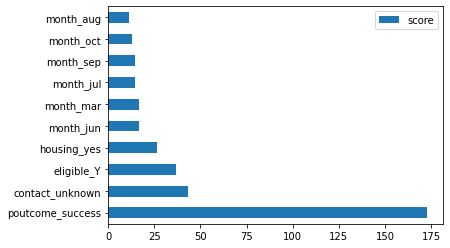

In [132]:
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost
    
feature_important = best_clf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:10].plot(kind='barh')

# HAY QUE REVISARLO, NO LLEGUE A VERLO EN DETALLE

# ROC Cruve

<Figure size 720x720 with 0 Axes>

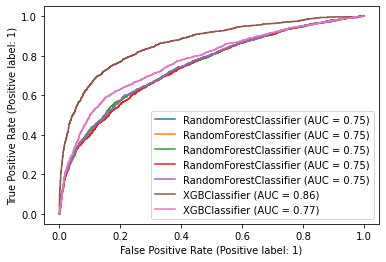

In [151]:
# arreglar
disp = plot_roc_curve(rf1_1, X_test, y_test)
plot_roc_curve(rf1_2, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_3, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_4, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf1_1, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(rf2_2, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(rf2_3, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(rf2_4, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_simple, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(xgb_multiple_1, X_test, y_test, ax=disp.ax_)
plot_roc_curve(xgb_simple_under, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(xgb_multiple_under, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(svm_2_1, X_test, y_test, ax=disp.ax_)
# plot_roc_curve(svm_under, X_test, y_test, ax=disp.ax_)